<a href="https://colab.research.google.com/github/fjgr/IA_BigData/blob/main/Proyecto/Prediccion_Consumo_Energetico_Gran_Canaria_Completo(OK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:center; background-color:#003366; padding:40px; border-radius:10px;">
    <h1 style="color:white; font-size:36px;">TRABAJO FIN DE CURSO</h1>
    <br>
    <h2 style="color:white; font-size:28px;">PREDICCIÓN DE CONSUMO ENERGÉTICO EN GRAN CANARIA MEDIANTE DATOS METEOROLÓGICOS</h2>
    <br>
    <p style="color:white; font-size:18px;">Modelo de Red Neuronal Concurrente con PyTorch</p>
    <br>
    <p style="color:white; font-size:16px;">Periodo de análisis: 01/01/2020 - 30/06/2024</p>
    <br>
    <p style="color:#cccccc; font-style:italic;">Fecha de elaboración: Mayo 2025</p>
</div>

# Índice

1. [Introducción](#1-introducción)
2. [Breve sumario de productos o resultados obtenidos](#2-breve-sumario-de-productos-o-resultados-obtenidos)
3. [Contexto y justificación del Trabajo](#3-contexto-y-justificación-del-trabajo)
   1. [Objetivos del Trabajo](#31-objetivos-del-trabajo)
   2. [Enfoque y metodología](#32-enfoque-y-metodología)
   3. [Planificación del Trabajo](#33-planificación-del-trabajo)
   4. [Recursos de sistemas utilizados](#34-recursos-de-sistemas-utilizados)
4. [Creación del set de datos](#4-creación-del-set-de-datos)
   1. [Estudio de datos necesarios](#41-estudio-de-datos-necesarios)
   2. [Fuente de datos](#42-fuente-de-datos)
   3. [Recolección de los datos](#43-recolección-de-los-datos)
   4. [Calidad e integridad de los datos](#44-calidad-e-integridad-de-los-datos)
   5. [Visualización de datos](#45-visualización-de-datos)
5. [Optimización, normalización y calidad del set de datos](#5-optimización-normalización-y-calidad-del-set-de-datos)
6. [Desarrollo del modelo predictivo](#6-desarrollo-del-modelo-predictivo)
   1. [Justificación del modelo seleccionado](#61-justificación-del-modelo-seleccionado)
   2. [Descripción del modelo](#62-descripción-del-modelo)
7. [Entrenamiento y evaluación del modelo predictivo](#7-entrenamiento-y-evaluación-del-modelo-predictivo)
8. [Informe de rendimiento y métricas en aula virtualizada y otros entornos](#8-informe-de-rendimiento-y-métricas-en-aula-virtualizada-y-otros-entornos)
9. [Puesta en producción (API y aplicación cliente)](#9-puesta-en-producción-api-y-aplicación-cliente)
10. [Conclusiones y mejoras a realizar, modelos alternativos](#10-conclusiones-y-mejoras-a-realizar-modelos-alternativos)
11. [Bibliografía / Webgrafía](#11-bibliografía--webgrafía)
12. [Presentación final](#12-presentación-final)

# 1. Introducción

Este trabajo fin de curso aborda la predicción del consumo energético en la isla de Gran Canaria utilizando variables meteorológicas como predictores. En un contexto global donde la eficiencia energética y la sostenibilidad son prioritarias, la capacidad de predecir con precisión la demanda energética se convierte en una herramienta fundamental para la planificación y gestión de recursos.

Gran Canaria, como isla con un ecosistema energético particular y condiciones climáticas específicas, presenta un caso de estudio interesante donde las variables meteorológicas pueden tener un impacto significativo en los patrones de consumo energético. Este proyecto busca explorar y modelar esta relación mediante técnicas avanzadas de aprendizaje profundo, específicamente utilizando redes neuronales concurrentes implementadas con PyTorch.

El análisis se centra en datos recopilados durante un período de cuatro años y medio (desde enero de 2020 hasta junio de 2024), considerando variables como temperatura y humedad en diferentes zonas de la isla, así como el consumo energético registrado por municipios. El objetivo final es desarrollar un modelo predictivo robusto que pueda ser implementado en un entorno de producción a través de una API y una aplicación cliente web.

In [1]:
# Importación de librerías necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuración para reproducibilidad
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Verificar disponibilidad de GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo utilizado: {device}")

Dispositivo utilizado: cuda:0


# 2. Breve sumario de productos o resultados obtenidos

Este proyecto ha generado los siguientes productos y resultados principales:

1. **Dataset procesado y optimizado**: A partir de los datos originales de consumo energético y variables meteorológicas de Gran Canaria, se ha creado un conjunto de datos limpio, normalizado y estructurado por zonas geográficas (norte, este, sur y resto), abarcando el período desde enero de 2020 hasta junio de 2024.

2. **Modelo predictivo de red neuronal concurrente**: Se ha desarrollado un modelo de aprendizaje profundo utilizando PyTorch que procesa de manera concurrente las variables meteorológicas de diferentes zonas para predecir el consumo energético total de la isla. Este modelo aprovecha la arquitectura de redes neuronales para capturar relaciones complejas entre las variables climáticas y el consumo.

3. **Análisis de rendimiento y métricas**: Se ha realizado una evaluación exhaustiva del modelo, obteniendo métricas de rendimiento como MAE, RMSE y R², que demuestran la capacidad predictiva del sistema implementado.

4. **API de predicción**: Se ha desarrollado una API utilizando FastAPI que permite realizar predicciones de consumo energético a partir de datos meteorológicos en tiempo real o proyectados.

5. **Aplicación cliente web**: Se ha implementado una interfaz web que facilita la interacción con el modelo predictivo, permitiendo visualizar predicciones y resultados históricos de manera intuitiva.

6. **Documentación técnica**: Todo el proceso, desde la preparación de datos hasta la implementación del modelo y su despliegue, ha sido documentado detalladamente en este cuaderno, facilitando la comprensión y reproducibilidad del trabajo realizado.

# 3. Contexto y justificación del Trabajo

La predicción del consumo energético es un área de creciente importancia en el contexto actual de transición energética y sostenibilidad. En territorios insulares como Gran Canaria, con sistemas energéticos aislados y alta dependencia de combustibles importados, la capacidad de predecir con precisión la demanda energética adquiere un valor estratégico fundamental.

Las islas Canarias, y específicamente Gran Canaria, presentan características particulares que hacen que este estudio sea especialmente relevante:

1. **Sistema energético aislado**: Al ser un territorio insular, Gran Canaria no está conectada a grandes redes eléctricas continentales, lo que implica mayores desafíos en la gestión de la oferta y demanda energética.

2. **Alta dependencia de combustibles fósiles importados**: A pesar del crecimiento de las energías renovables, Gran Canaria aún depende significativamente de combustibles fósiles para la generación eléctrica, lo que hace crucial la optimización de recursos.

3. **Microclimas diversos**: La isla presenta una variedad de microclimas que pueden influir de manera diferente en los patrones de consumo energético según la zona geográfica.

4. **Estacionalidad turística**: Como destino turístico importante, Gran Canaria experimenta fluctuaciones poblacionales que impactan en el consumo energético a lo largo del año.

En este contexto, el desarrollo de modelos predictivos avanzados que incorporen variables meteorológicas puede proporcionar herramientas valiosas para:

- Optimizar la planificación de la generación eléctrica
- Mejorar la integración de energías renovables en la red
- Reducir costes operativos y ambientales
- Aumentar la resiliencia del sistema energético insular

La utilización de técnicas de aprendizaje profundo, específicamente redes neuronales concurrentes, permite abordar la complejidad de estas relaciones y capturar patrones no lineales que métodos más tradicionales podrían no detectar.

## 3.1. Objetivos del Trabajo

Este trabajo se ha planteado con los siguientes objetivos específicos:

1. **Objetivo principal**: Desarrollar un modelo predictivo basado en redes neuronales concurrentes que permita predecir con precisión el consumo energético total de la isla de Gran Canaria utilizando variables meteorológicas como predictores.

2. **Objetivos secundarios**:
   - Analizar la relación entre variables meteorológicas (temperatura y humedad) y el consumo energético en diferentes zonas de Gran Canaria.
   - Identificar patrones temporales y espaciales en el consumo energético de la isla.
   - Evaluar la capacidad predictiva de diferentes arquitecturas de redes neuronales para este problema específico.
   - Implementar un sistema completo que incluya desde la preparación de datos hasta una API funcional y una aplicación cliente.
   - Proporcionar una herramienta que pueda ser utilizada para la planificación energética en la isla.
   - Documentar detalladamente todo el proceso para facilitar su reproducibilidad y posibles mejoras futuras.

## 3.2. Enfoque y metodología

Para abordar los objetivos planteados, se ha seguido una metodología estructurada que combina técnicas de análisis de datos, aprendizaje automático y desarrollo de software:

1. **Enfoque de análisis de datos**:
   - Análisis exploratorio de datos (EDA) para comprender la estructura y características de los datos disponibles.
   - Preprocesamiento y limpieza de datos para garantizar su calidad.
   - Ingeniería de características para extraer información relevante de las variables meteorológicas y temporales.
   - Análisis de correlaciones entre variables meteorológicas y consumo energético por zonas.

2. **Enfoque de modelado**:
   - Utilización de redes neuronales concurrentes implementadas con PyTorch.
   - División de datos en conjuntos de entrenamiento, validación y prueba.
   - Experimentación con diferentes arquitecturas y parámetros del modelo.
   - Evaluación rigurosa mediante métricas como MAE, RMSE y R².

3. **Enfoque de desarrollo**:
   - Implementación modular del código para facilitar su mantenimiento y extensibilidad.
   - Desarrollo de una API con FastAPI para exponer el modelo entrenado.
   - Creación de una interfaz web para interactuar con el modelo.
   - Documentación exhaustiva de todo el proceso.

Esta metodología sigue un enfoque iterativo, donde los resultados de cada fase informan y refinan las siguientes, permitiendo ajustes y mejoras continuas a lo largo del desarrollo del proyecto.

## 3.3. Planificación del Trabajo

El desarrollo de este proyecto se ha estructurado en las siguientes fases y tareas principales:

1. **Fase de preparación y análisis inicial** (Semanas 1-2):
   - Definición de objetivos y alcance del proyecto
   - Recopilación y exploración inicial de datos
   - Análisis de requisitos técnicos y funcionales

2. **Fase de procesamiento de datos** (Semanas 3-4):
   - Limpieza y preprocesamiento del dataset
   - Análisis exploratorio detallado
   - Ingeniería de características
   - Normalización y optimización del conjunto de datos

3. **Fase de desarrollo del modelo** (Semanas 5-7):
   - Diseño de la arquitectura de red neuronal concurrente
   - Implementación del modelo en PyTorch
   - Entrenamiento y ajuste de hiperparámetros
   - Evaluación y validación del modelo

4. **Fase de implementación y despliegue** (Semanas 8-10):
   - Desarrollo de la API con FastAPI
   - Creación de la interfaz web
   - Integración de componentes
   - Pruebas de rendimiento y usabilidad

5. **Fase de documentación y cierre** (Semanas 11-12):
   - Documentación técnica completa
   - Análisis de resultados y conclusiones
   - Identificación de mejoras futuras
   - Preparación de la presentación final

Esta planificación ha permitido abordar el proyecto de manera estructurada, asignando tiempos adecuados a cada fase según su complejidad y garantizando la calidad de los entregables finales.

## 3.4. Recursos de sistemas utilizados

Para el desarrollo de este proyecto se han utilizado los siguientes recursos tecnológicos:

1. **Hardware**:
   - Equipo de desarrollo con capacidad de procesamiento para entrenamiento de modelos de aprendizaje profundo
   - Memoria RAM suficiente para procesamiento de datos (mínimo 16GB)
   - Capacidad de almacenamiento para datasets y modelos entrenados

2. **Software y frameworks**:
   - Python 3.8+ como lenguaje principal de programación
   - PyTorch para el desarrollo y entrenamiento del modelo de red neuronal concurrente
   - Pandas y NumPy para manipulación y procesamiento de datos
   - Matplotlib y Seaborn para visualización de datos
   - Scikit-learn para preprocesamiento y evaluación de modelos
   - FastAPI para el desarrollo de la API
   - HTML, CSS y JavaScript para la interfaz web
   - Git para control de versiones
   - Google Colab para desarrollo y documentación del proyecto

3. **Entornos de desarrollo y despliegue**:
   - Google Colab para desarrollo y experimentación
   - Entorno local para pruebas de integración
   - Servidor para despliegue de la API y aplicación web

4. **Datos**:
   - Dataset con variables meteorológicas y consumo energético de Gran Canaria (2020-2024)
   - Recursos adicionales para contextualización y validación

La selección de estas herramientas y recursos se ha realizado considerando su idoneidad para las tareas específicas del proyecto, así como su interoperabilidad y capacidad para satisfacer los requisitos técnicos establecidos.

# 4. Creación del set de datos

En esta sección se detalla el proceso de creación y preparación del conjunto de datos utilizado para el desarrollo del modelo predictivo de consumo energético en Gran Canaria.

## 4.1. Estudio de datos necesarios

Para abordar el problema de predicción de consumo energético en Gran Canaria, se identificaron las siguientes categorías de datos como necesarias:

1. **Variables meteorológicas**:
   - Temperatura: Variable fundamental que influye directamente en el uso de sistemas de climatización (calefacción/refrigeración).
   - Humedad: Factor que afecta la sensación térmica y, por tanto, puede influir en el consumo energético relacionado con la climatización.

2. **Variables temporales**:
   - Fecha: Permite capturar patrones estacionales, tendencias y ciclos en el consumo energético.

3. **Variables de consumo energético**:
   - Consumo por municipio: Datos desagregados que permiten analizar patrones locales.
   - Consumo total: Variable objetivo que se busca predecir.

4. **Variables geográficas**:
   - Agrupación de municipios por zonas (norte, este, sur, resto): Permite analizar patrones regionales y simplificar el modelado.

La selección de estas variables se basó en estudios previos sobre factores que influyen en el consumo energético, así como en las características específicas de Gran Canaria como territorio insular con diversos microclimas.

## 4.2. Fuente de datos

Los datos utilizados en este proyecto provienen de un conjunto de datos compilado específicamente para este estudio, que integra información de diversas fuentes:

- **Datos meteorológicos**: Recopilados de estaciones meteorológicas distribuidas en diferentes zonas de Gran Canaria, proporcionando mediciones diarias de temperatura y humedad.

- **Datos de consumo energético**: Obtenidos de registros de consumo eléctrico por municipio, proporcionados por operadores energéticos de la isla.

El dataset consolidado abarca un período de cuatro años y medio, desde el 1 de enero de 2020 hasta el 30 de junio de 2024, lo que proporciona una ventana temporal suficientemente amplia para capturar patrones estacionales y tendencias a medio plazo.

## 4.3. Recolección de los datos

Para este proyecto, utilizamos un dataset ya consolidado que se encuentra disponible en un repositorio de GitHub. A continuación, procedemos a cargar y examinar estos datos:

In [2]:
# Cargar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL del dataset
url = 'https://raw.githubusercontent.com/fjgr/IA_BigData/refs/heads/main/dataset/dataset_temp_consumo.csv'

# Cargar el dataset
df = pd.read_csv(url)

# Mostrar las primeras filas para verificar la carga correcta
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,fecha,temp_este,temp_norte,temp_sur,hum_este,hum_norte,hum_sur,Agüimes,Arucas,Gáldar,Ingenio,Las Palmas de Gran Canaria,Mogán,San Bartolomé de Tirajana,Santa Lucía de Tirajana,Telde,otros_municipios,consumo_total
0,2020-01-01,15.98,16.50,17.10,51.25,52.0,49.75,262.81,240.26,189.96,151.37,2521.90,680.43,1372.15,491.21,1149.85,574.69,7634.63
1,2020-01-02,15.78,15.95,16.30,44.25,46.5,43.25,358.00,263.98,210.29,184.93,3186.71,709.99,1468.57,485.09,1363.15,659.53,8890.24
2,2020-01-03,16.02,16.50,16.60,45.75,50.0,42.50,368.43,268.47,208.20,186.64,3219.53,713.29,1526.16,506.92,1443.41,664.58,9105.63
3,2020-01-04,16.38,16.30,16.82,60.50,67.5,53.25,287.93,261.22,188.89,175.22,2981.85,698.66,1481.12,558.76,1422.27,633.43,8689.35
4,2020-01-05,17.52,16.90,16.98,64.25,68.5,62.25,261.39,246.11,181.39,158.13,2845.99,675.66,1372.61,540.47,1377.86,616.16,8275.77


In [3]:
# Información básica del dataset
print("Información del dataset:")
print(f"Número de filas: {len(df)}")
print(f"Número de columnas: {len(df.columns)}")
print("\nColumnas disponibles:")
print(df.columns.tolist())

# Verificar el rango de fechas
df['fecha'] = pd.to_datetime(df['fecha'])
print(f"\nRango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Total de días: {(df['fecha'].max() - df['fecha'].min()).days + 1}")
print(f"Número de registros: {len(df)}")

Información del dataset:
Número de filas: 1643
Número de columnas: 18

Columnas disponibles:
['fecha', 'temp_este', 'temp_norte', 'temp_sur', 'hum_este', 'hum_norte', 'hum_sur', 'Agüimes', 'Arucas', 'Gáldar', 'Ingenio', 'Las Palmas de Gran Canaria', 'Mogán', 'San Bartolomé de Tirajana', 'Santa Lucía de Tirajana', 'Telde', 'otros_municipios', 'consumo_total']

Rango de fechas: 2020-01-01 00:00:00 a 2024-06-30 00:00:00
Total de días: 1643
Número de registros: 1643


## 4.4. Calidad e integridad de los datos

Es fundamental evaluar la calidad e integridad de los datos antes de utilizarlos para el modelado. A continuación, realizamos un análisis detallado para identificar posibles problemas como valores faltantes, outliers o inconsistencias:

In [4]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar la consistencia de los datos
# Comprobar si el consumo total es igual a la suma de los consumos por municipio
municipios = ['Agüimes', 'Arucas', 'Gáldar', 'Ingenio', 'Las Palmas de Gran Canaria',
              'Mogán', 'San Bartolomé de Tirajana', 'Santa Lucía de Tirajana', 'Telde', 'otros_municipios']

df['suma_municipios'] = df[municipios].sum(axis=1)
df['diferencia'] = df['consumo_total'] - df['suma_municipios']

print("\nVerificación de consistencia (consumo_total vs suma de municipios):")
print(f"Diferencia media: {df['diferencia'].mean()}")
print(f"Diferencia máxima: {df['diferencia'].max()}")
print(f"Diferencia mínima: {df['diferencia'].min()}")

# Eliminar columnas auxiliares creadas para la verificación
df = df.drop(['suma_municipios', 'diferencia'], axis=1)

Valores nulos por columna:
fecha                         0
temp_este                     0
temp_norte                    0
temp_sur                      0
hum_este                      0
hum_norte                     0
hum_sur                       0
Agüimes                       0
Arucas                        0
Gáldar                        0
Ingenio                       0
Las Palmas de Gran Canaria    0
Mogán                         0
San Bartolomé de Tirajana     0
Santa Lucía de Tirajana       0
Telde                         0
otros_municipios              0
consumo_total                 0
dtype: int64

Estadísticas descriptivas:
                     fecha    temp_este   temp_norte     temp_sur  \
count                 1643  1643.000000  1643.000000  1643.000000   
mean   2022-04-01 00:00:00    21.146610    20.036969    21.415946   
min    2020-01-01 00:00:00    13.880000    12.250000    14.050000   
25%    2021-02-14 12:00:00    18.650000    17.975000    18.770000   
50%    2022

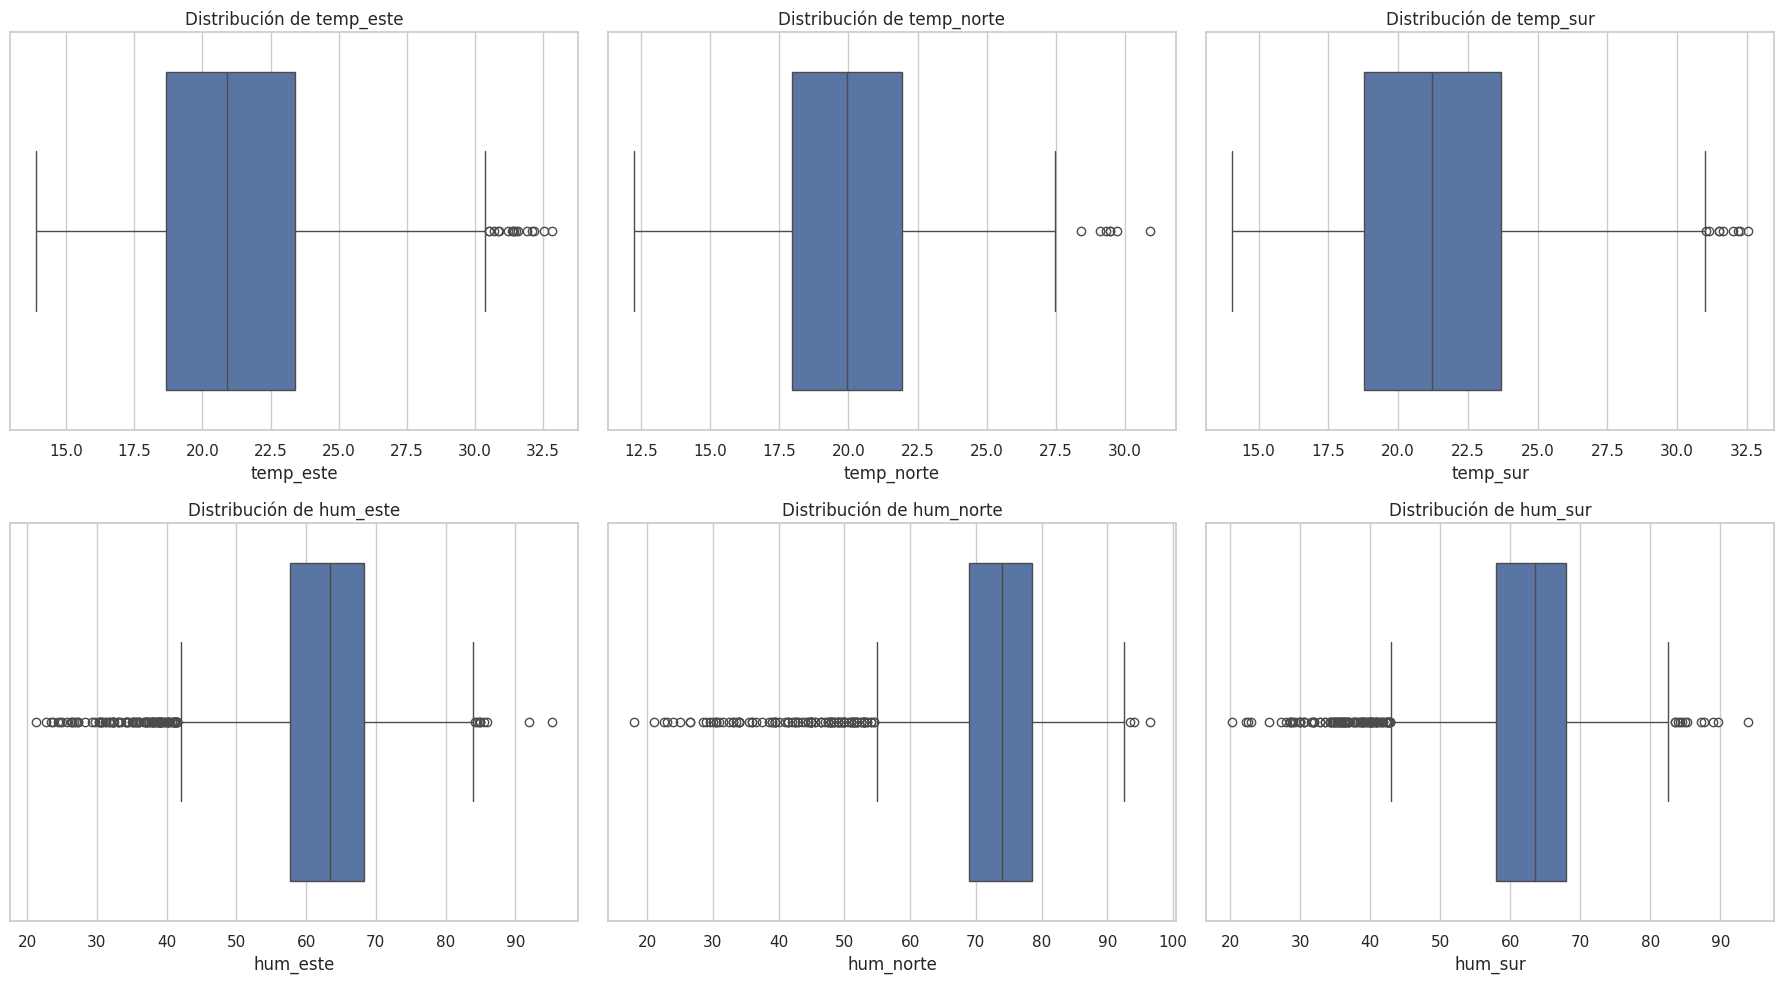

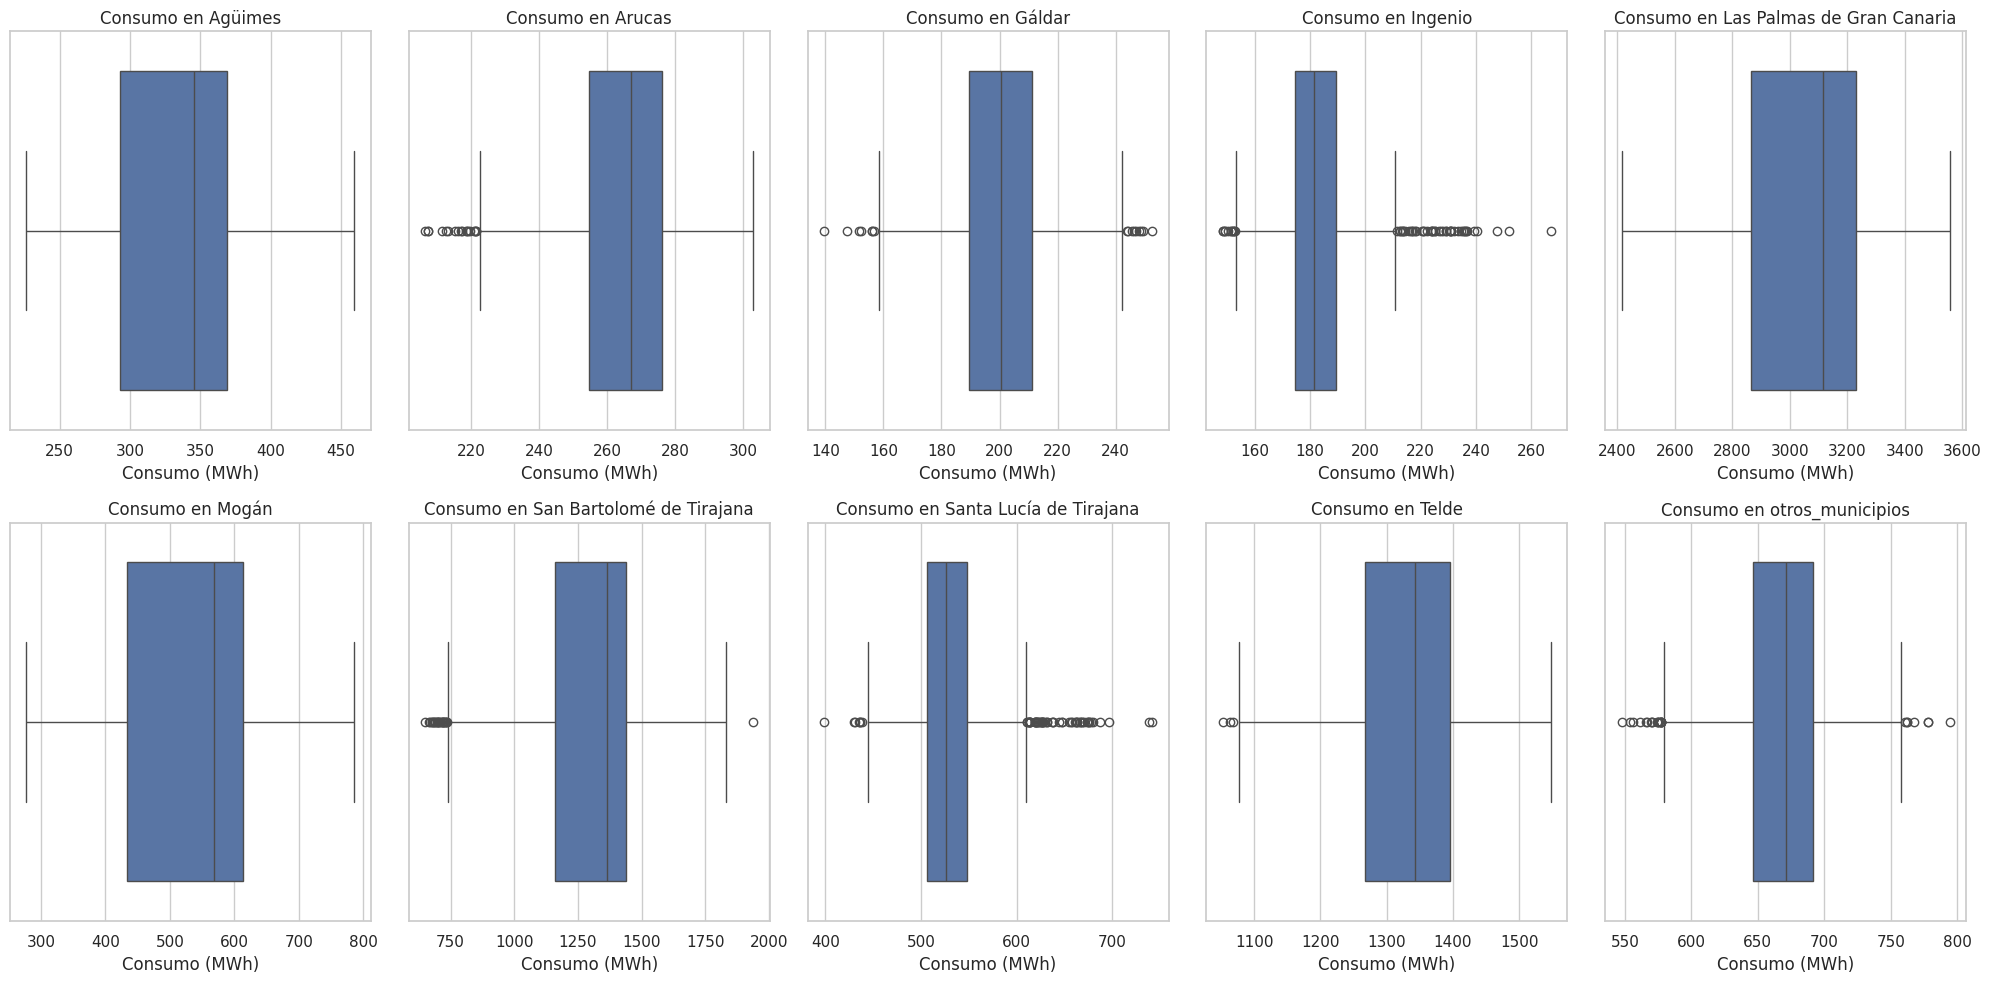

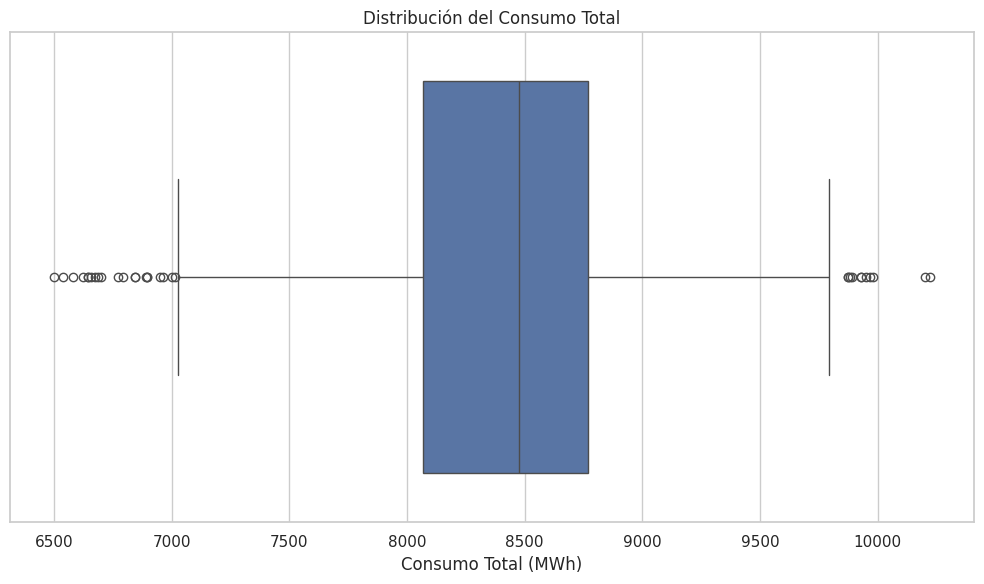

In [5]:
# Verificar la presencia de outliers en las variables meteorológicas
variables_meteorologicas = ['temp_este', 'temp_norte', 'temp_sur', 'hum_este', 'hum_norte', 'hum_sur']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables_meteorologicas):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

# Verificar la presencia de outliers en las variables de consumo
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, municipio in enumerate(municipios):
    sns.boxplot(x=df[municipio], ax=axes[i])
    axes[i].set_title(f'Consumo en {municipio}')
    axes[i].set_xlabel('Consumo (MWh)')

plt.tight_layout()
plt.show()

# Boxplot para consumo total
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['consumo_total'])
plt.title('Distribución del Consumo Total')
plt.xlabel('Consumo Total (MWh)')
plt.tight_layout()
plt.show()

## 4.5. Visualización de datos

La visualización de datos es una herramienta poderosa para comprender patrones, tendencias y relaciones en el conjunto de datos. A continuación, realizamos diversas visualizaciones para explorar las características de nuestros datos:

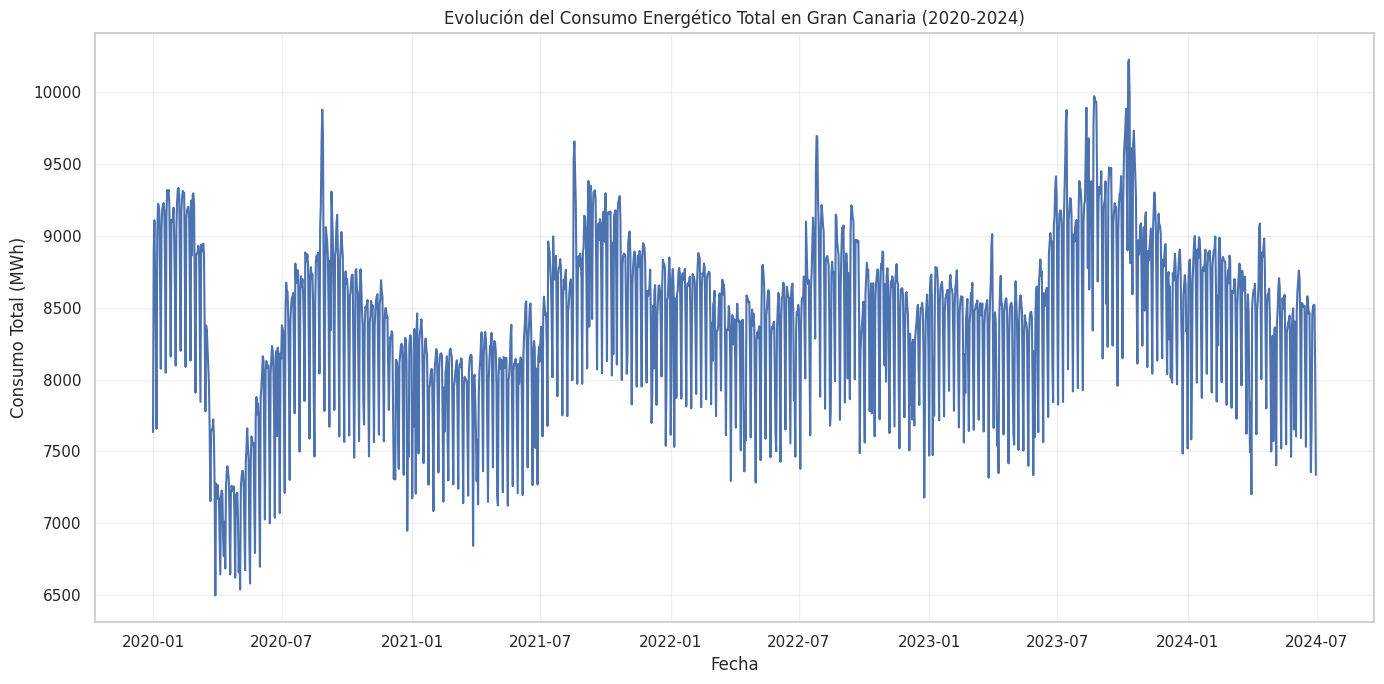

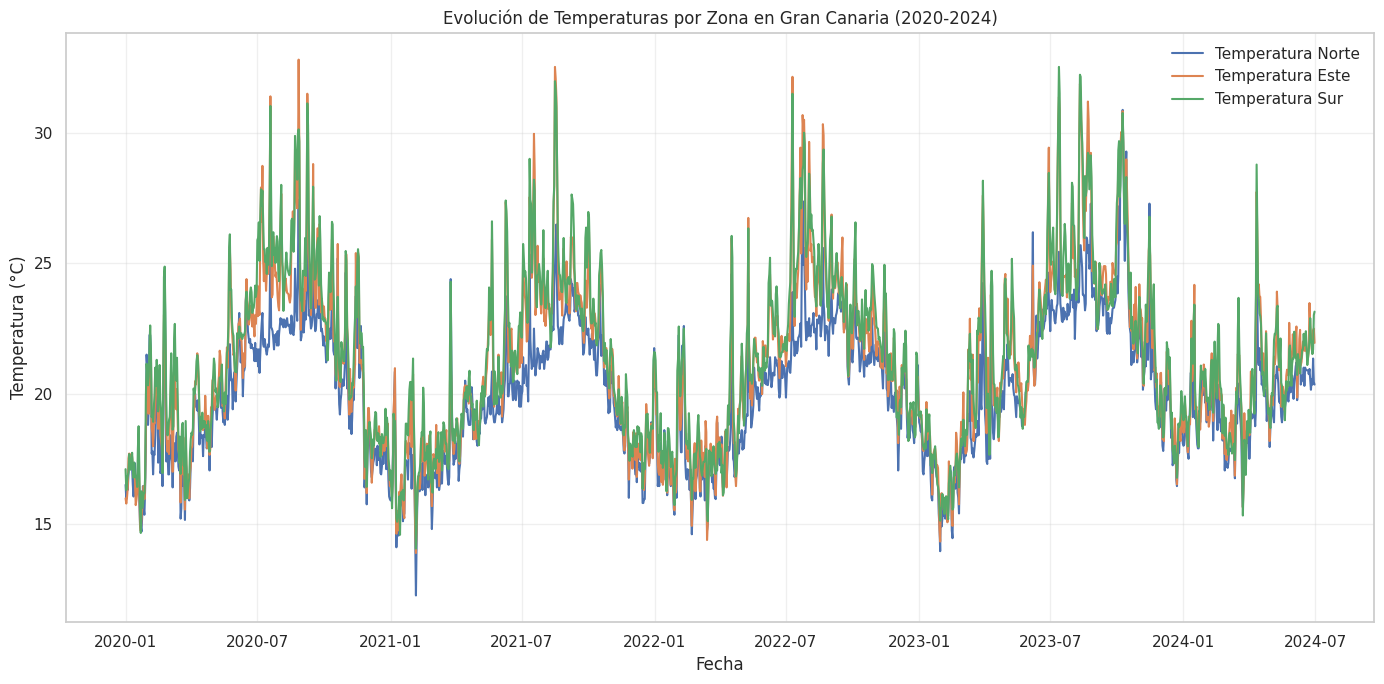

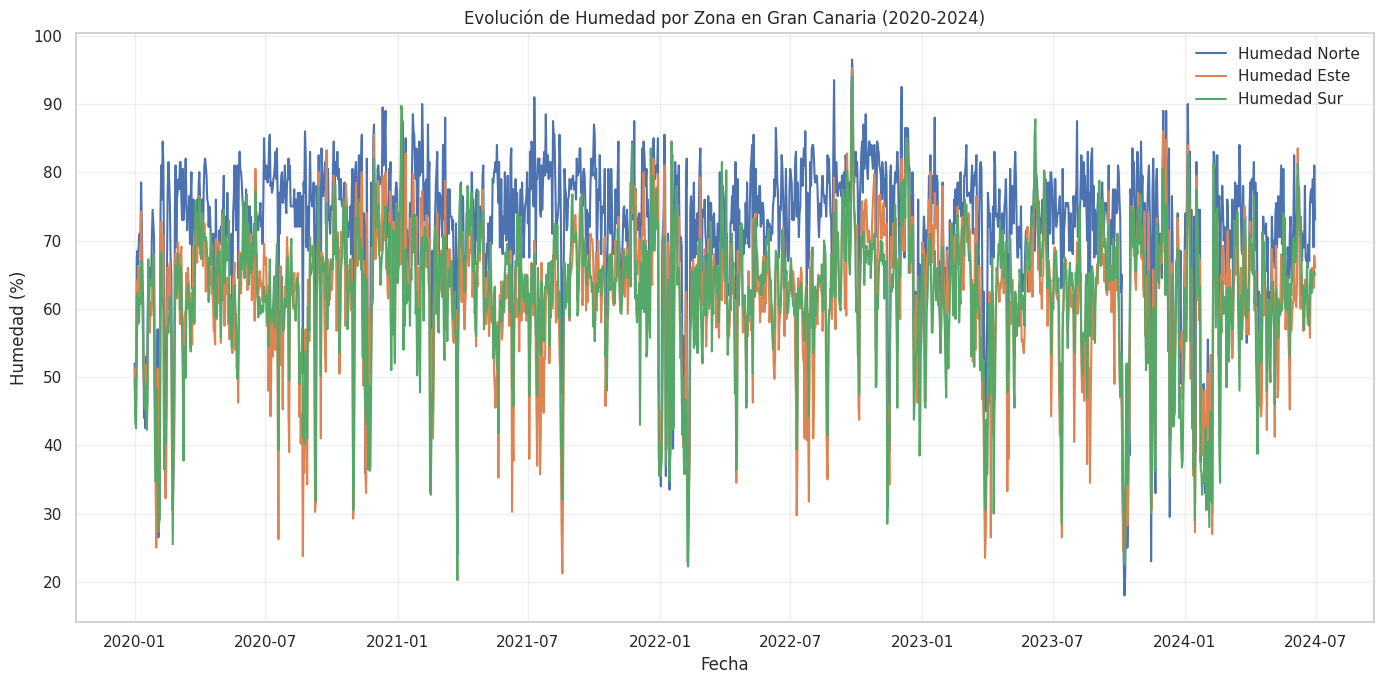

In [6]:
# Evolución temporal del consumo total
plt.figure(figsize=(14, 7))
plt.plot(df['fecha'], df['consumo_total'])
plt.title('Evolución del Consumo Energético Total en Gran Canaria (2020-2024)')
plt.xlabel('Fecha')
plt.ylabel('Consumo Total (MWh)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evolución temporal de las temperaturas por zona
plt.figure(figsize=(14, 7))
plt.plot(df['fecha'], df['temp_norte'], label='Temperatura Norte')
plt.plot(df['fecha'], df['temp_este'], label='Temperatura Este')
plt.plot(df['fecha'], df['temp_sur'], label='Temperatura Sur')
plt.title('Evolución de Temperaturas por Zona en Gran Canaria (2020-2024)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evolución temporal de la humedad por zona
plt.figure(figsize=(14, 7))
plt.plot(df['fecha'], df['hum_norte'], label='Humedad Norte')
plt.plot(df['fecha'], df['hum_este'], label='Humedad Este')
plt.plot(df['fecha'], df['hum_sur'], label='Humedad Sur')
plt.title('Evolución de Humedad por Zona en Gran Canaria (2020-2024)')
plt.xlabel('Fecha')
plt.ylabel('Humedad (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

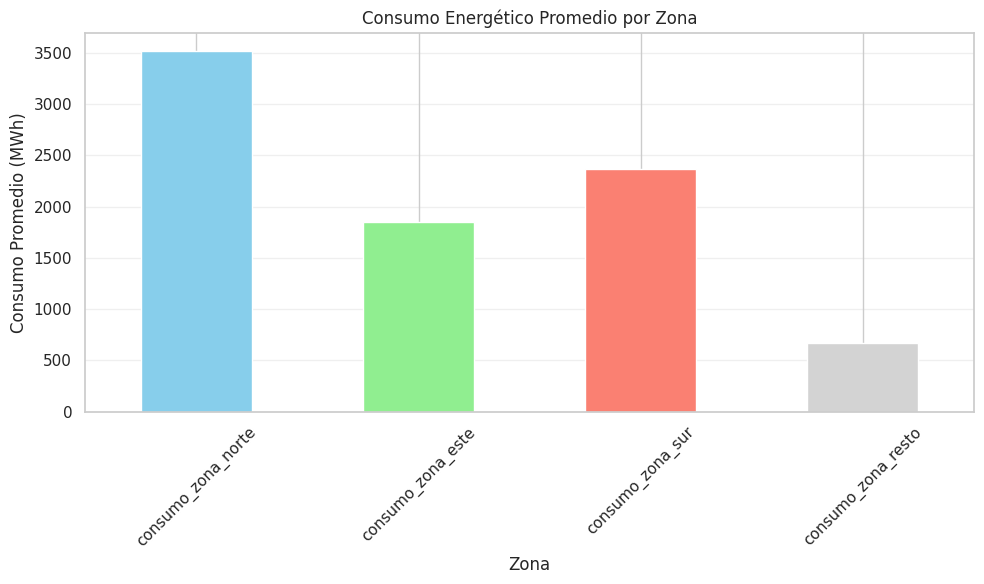

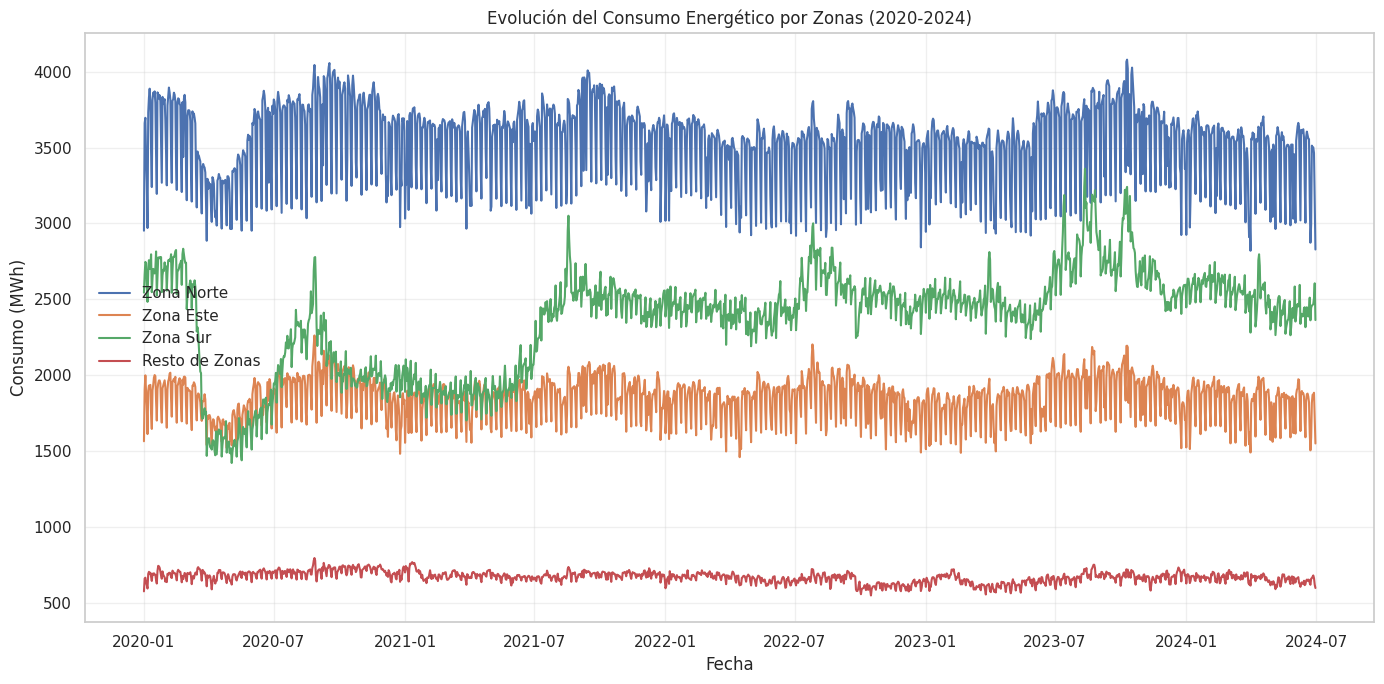

In [7]:
# Crear columnas para agrupar municipios por zonas
df['consumo_zona_norte'] = df[['Arucas', 'Gáldar', 'Las Palmas de Gran Canaria']].sum(axis=1)
df['consumo_zona_este'] = df[['Agüimes', 'Ingenio', 'Telde']].sum(axis=1)
df['consumo_zona_sur'] = df[['Mogán', 'San Bartolomé de Tirajana', 'Santa Lucía de Tirajana']].sum(axis=1)
df['consumo_zona_resto'] = df['otros_municipios']

# Visualizar la distribución del consumo por zonas
consumo_zonas = df[['consumo_zona_norte', 'consumo_zona_este', 'consumo_zona_sur', 'consumo_zona_resto']].mean()
plt.figure(figsize=(10, 6))
consumo_zonas.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'lightgray'])
plt.title('Consumo Energético Promedio por Zona')
plt.xlabel('Zona')
plt.ylabel('Consumo Promedio (MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Evolución temporal del consumo por zonas
plt.figure(figsize=(14, 7))
plt.plot(df['fecha'], df['consumo_zona_norte'], label='Zona Norte')
plt.plot(df['fecha'], df['consumo_zona_este'], label='Zona Este')
plt.plot(df['fecha'], df['consumo_zona_sur'], label='Zona Sur')
plt.plot(df['fecha'], df['consumo_zona_resto'], label='Resto de Zonas')
plt.title('Evolución del Consumo Energético por Zonas (2020-2024)')
plt.xlabel('Fecha')
plt.ylabel('Consumo (MWh)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

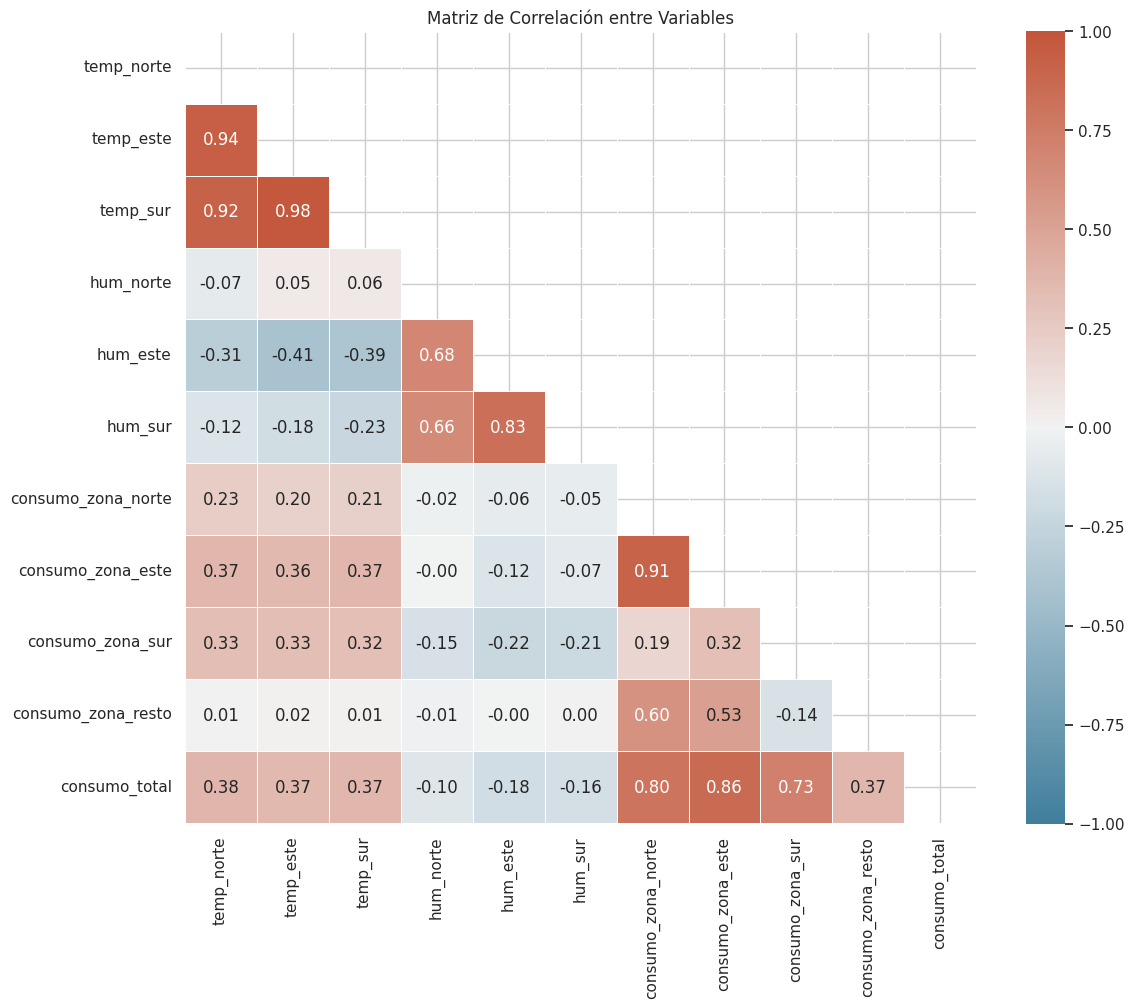

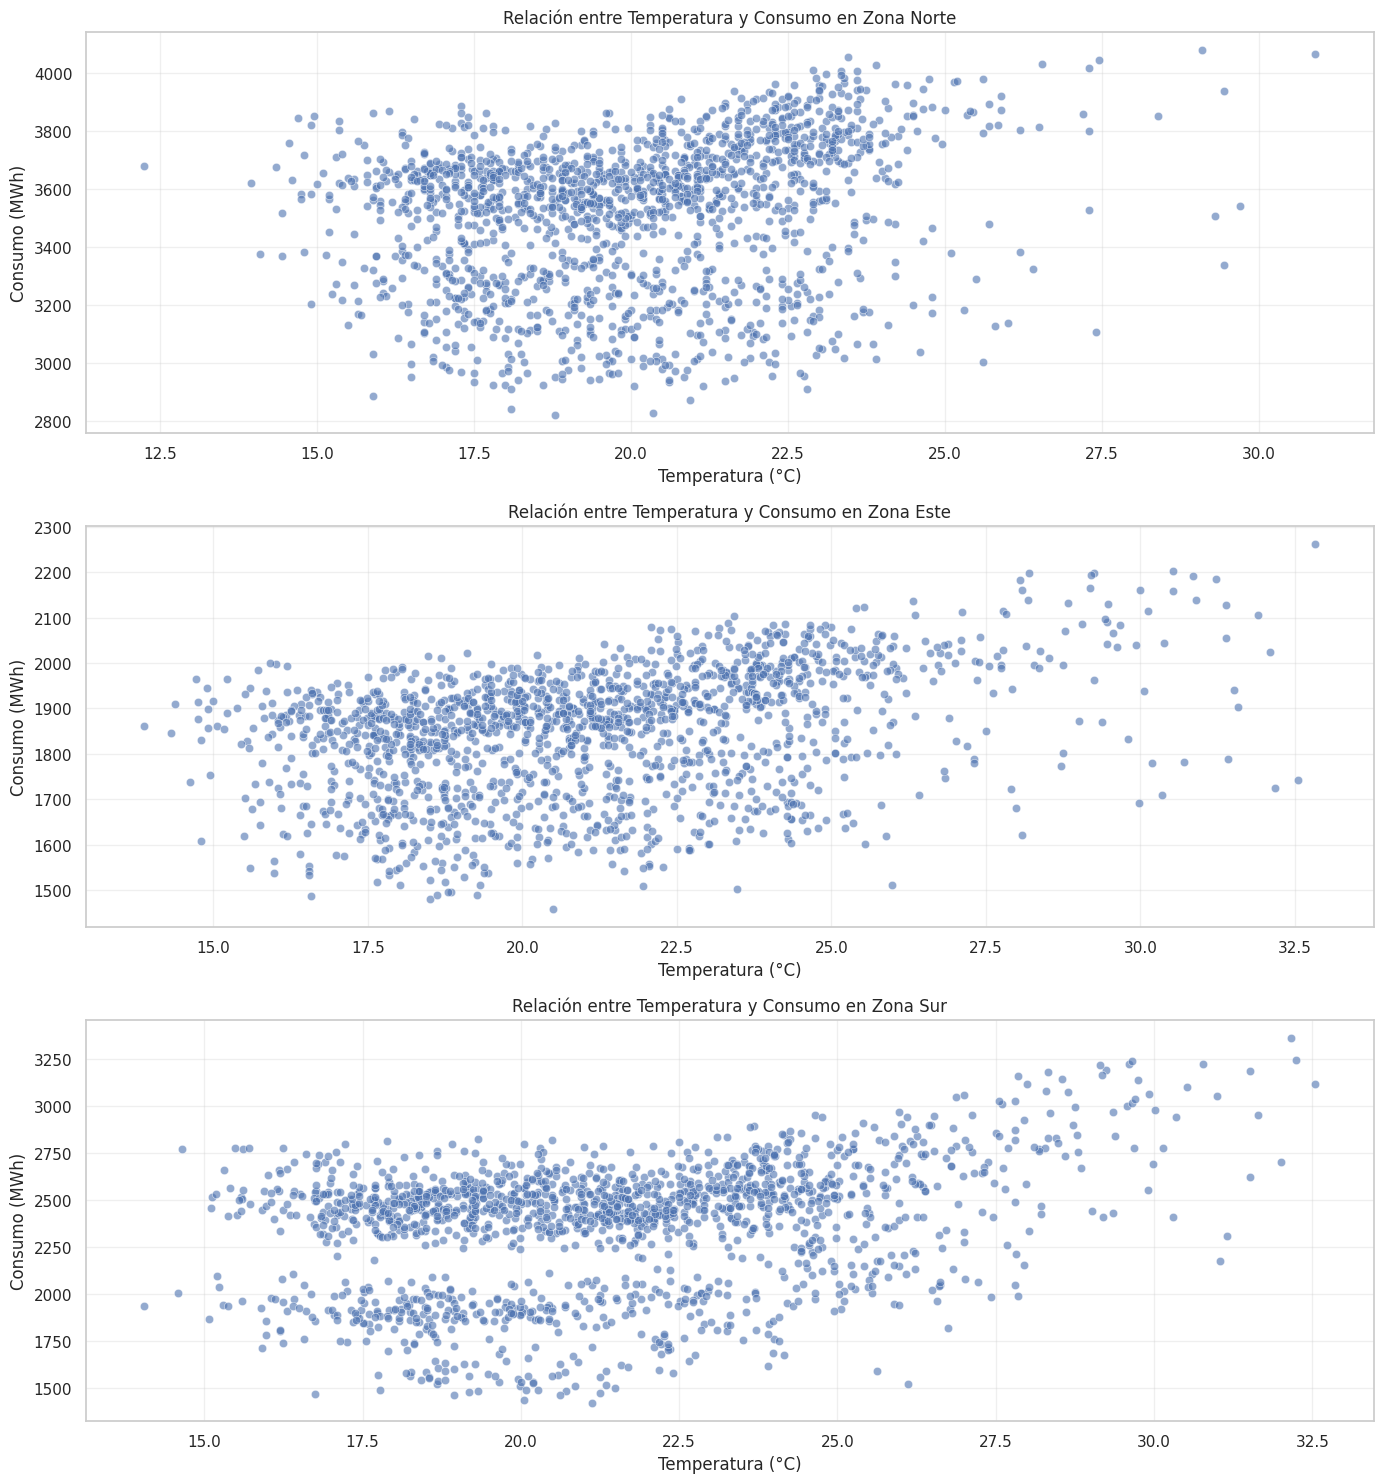

In [8]:
# Análisis de correlación entre variables
# Seleccionar variables relevantes para el análisis de correlación
variables_correlacion = ['temp_norte', 'temp_este', 'temp_sur',
                         'hum_norte', 'hum_este', 'hum_sur',
                         'consumo_zona_norte', 'consumo_zona_este', 'consumo_zona_sur', 'consumo_zona_resto',
                         'consumo_total']

# Calcular la matriz de correlación
corr_matrix = df[variables_correlacion].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()

# Visualizar la relación entre temperatura y consumo por zonas
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

# Zona Norte
sns.scatterplot(x=df['temp_norte'], y=df['consumo_zona_norte'], ax=axes[0], alpha=0.6)
axes[0].set_title('Relación entre Temperatura y Consumo en Zona Norte')
axes[0].set_xlabel('Temperatura (°C)')
axes[0].set_ylabel('Consumo (MWh)')
axes[0].grid(True, alpha=0.3)

# Zona Este
sns.scatterplot(x=df['temp_este'], y=df['consumo_zona_este'], ax=axes[1], alpha=0.6)
axes[1].set_title('Relación entre Temperatura y Consumo en Zona Este')
axes[1].set_xlabel('Temperatura (°C)')
axes[1].set_ylabel('Consumo (MWh)')
axes[1].grid(True, alpha=0.3)

# Zona Sur
sns.scatterplot(x=df['temp_sur'], y=df['consumo_zona_sur'], ax=axes[2], alpha=0.6)
axes[2].set_title('Relación entre Temperatura y Consumo en Zona Sur')
axes[2].set_xlabel('Temperatura (°C)')
axes[2].set_ylabel('Consumo (MWh)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Optimización, normalización y calidad del set de datos

Una vez explorado el conjunto de datos, procedemos a optimizarlo y prepararlo para su uso en el entrenamiento del modelo predictivo. Este proceso incluye la normalización de variables, la creación de características adicionales y la división en conjuntos de entrenamiento, validación y prueba.

In [9]:
# Extraer características temporales
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.dayofweek  # 0 es lunes, 6 es domingo
df['dia_año'] = df['fecha'].dt.dayofyear
df['es_fin_semana'] = df['dia_semana'].apply(lambda x: 1 if x >= 5 else 0)  # 1 si es sábado o domingo

# Crear variables cíclicas para capturar la estacionalidad
df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)
df['dia_año_sin'] = np.sin(2 * np.pi * df['dia_año'] / 365)
df['dia_año_cos'] = np.cos(2 * np.pi * df['dia_año'] / 365)

# Mostrar las nuevas características
print("Primeras filas con las nuevas características temporales:")
df[['fecha', 'año', 'mes', 'dia_semana', 'dia_año', 'es_fin_semana', 'mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos']].head()

Primeras filas con las nuevas características temporales:


,fecha,año,mes,dia_semana,dia_año,es_fin_semana,mes_sin,mes_cos,dia_año_sin,dia_año_cos
0,2020-01-01,2020,1,2,1,0,0.5,0.866025,0.017213,0.999852
1,2020-01-02,2020,1,3,2,0,0.5,0.866025,0.034422,0.999407
2,2020-01-03,2020,1,4,3,0,0.5,0.866025,0.051620,0.998667
3,2020-01-04,2020,1,5,4,1,0.5,0.866025,0.068802,0.997630
4,2020-01-05,2020,1,6,5,1,0.5,0.866025,0.085965,0.996298


In [10]:
# Seleccionar las características que se utilizarán para el modelo
features = [
    # Variables meteorológicas
    'temp_norte', 'temp_este', 'temp_sur', 'hum_norte', 'hum_este', 'hum_sur',
    # Variables temporales
    'mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos', 'es_fin_semana',
    # Consumo por zonas (para el modelo concurrente)
    'consumo_zona_norte', 'consumo_zona_este', 'consumo_zona_sur', 'consumo_zona_resto'
]

# Variable objetivo
target = 'consumo_total'

# Crear el conjunto de datos para el modelado
X = df[features]
y = df[target]

# Normalizar las características
from sklearn.preprocessing import StandardScaler

# Separar las características meteorológicas y temporales de las de consumo por zonas
features_meteo_temp = ['temp_norte', 'temp_este', 'temp_sur', 'hum_norte', 'hum_este', 'hum_sur',
                       'mes_sin', 'mes_cos', 'dia_año_sin', 'dia_año_cos', 'es_fin_semana']
features_consumo = ['consumo_zona_norte', 'consumo_zona_este', 'consumo_zona_sur', 'consumo_zona_resto']

# Normalizar las características meteorológicas y temporales
scaler_meteo_temp = StandardScaler()
X_meteo_temp_scaled = scaler_meteo_temp.fit_transform(X[features_meteo_temp])
X_meteo_temp_scaled_df = pd.DataFrame(X_meteo_temp_scaled, columns=features_meteo_temp, index=X.index)

# Normalizar las características de consumo por zonas
scaler_consumo = StandardScaler()
X_consumo_scaled = scaler_consumo.fit_transform(X[features_consumo])
X_consumo_scaled_df = pd.DataFrame(X_consumo_scaled, columns=features_consumo, index=X.index)

# Normalizar la variable objetivo
scaler_target = StandardScaler()
y_scaled = scaler_target.fit_transform(y.values.reshape(-1, 1)).flatten()

# Combinar las características normalizadas
X_scaled = pd.concat([X_meteo_temp_scaled_df, X_consumo_scaled_df], axis=1)

# Mostrar las primeras filas de los datos normalizados
print("Primeras filas de las características normalizadas:")
X_scaled.head()

Primeras filas de las características normalizadas:


,temp_norte,temp_este,temp_sur,hum_norte,hum_este,hum_sur,mes_sin,mes_cos,dia_año_sin,dia_año_cos,es_fin_semana,consumo_zona_norte,consumo_zona_este,consumo_zona_sur,consumo_zona_resto
0,-1.389372,-1.592624,-1.318990,-1.933567,-0.997886,-1.193017,0.619503,1.251784,-0.076069,1.413359,-0.632994,-2.220327,-2.074322,0.530857,-2.560477
1,-1.605420,-1.654275,-1.563477,-2.463476,-1.660596,-1.836022,0.619503,1.251784,-0.051606,1.412731,-0.632994,0.549299,0.434499,0.890514,-0.238078
2,-1.389372,-1.580294,-1.471794,-2.126261,-1.518587,-1.910215,0.619503,1.251784,-0.027158,1.411684,-0.632994,0.686909,1.112222,1.138727,-0.099840
3,-1.467935,-1.469323,-1.404561,-0.440188,-0.122163,-0.846784,0.619503,1.251784,-0.002732,1.410218,1.579793,-0.345518,0.282965,1.115232,-0.952536
4,-1.232247,-1.117914,-1.355663,-0.343841,0.232860,0.043530,0.619503,1.251784,0.021666,1.408334,1.579793,-0.964685,-0.362778,0.665736,-1.425282


In [11]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

# Primero, separar los datos en entrenamiento (80%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False
)

# Luego, dividir los datos de entrenamiento en entrenamiento (75%) y validación (25%)
# Esto resulta en una división aproximada de 60% entrenamiento, 20% validación, 20% prueba
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=False
)

# Verificar las dimensiones de los conjuntos
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de validación: {X_val.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

Dimensiones del conjunto de entrenamiento: (985, 15)
Dimensiones del conjunto de validación: (329, 15)
Dimensiones del conjunto de prueba: (329, 15)


In [12]:
# Guardar los escaladores para su uso posterior en la API
import joblib

# Crear un directorio para los modelos si no existe
import os
if not os.path.exists('models'):
    os.makedirs('models')

# Guardar los escaladores
joblib.dump(scaler_meteo_temp, 'models/scaler_meteo_temp.pkl')
joblib.dump(scaler_consumo, 'models/scaler_consumo.pkl')
joblib.dump(scaler_target, 'models/scaler_target.pkl')

print("Escaladores guardados correctamente.")

Escaladores guardados correctamente.


# 6. Desarrollo del modelo predictivo

En esta sección, desarrollaremos el modelo de red neuronal concurrente utilizando PyTorch para predecir el consumo energético total de Gran Canaria a partir de variables meteorológicas y datos de consumo por zonas.

## 6.1. Justificación del modelo seleccionado

Para abordar el problema de predicción de consumo energético en Gran Canaria, hemos optado por un modelo de red neuronal concurrente implementado con PyTorch. Esta elección se basa en las siguientes consideraciones:

1. **Capacidad para capturar relaciones complejas**: Las redes neuronales son especialmente adecuadas para modelar relaciones no lineales entre variables, lo que es fundamental en este caso donde la relación entre factores meteorológicos y consumo energético puede ser compleja y no lineal.

2. **Arquitectura concurrente**: La división de Gran Canaria en diferentes zonas geográficas (norte, este, sur, resto) con características climáticas distintas sugiere que un enfoque concurrente, donde se procesen de manera paralela las variables de cada zona antes de integrarlas, puede capturar mejor los patrones específicos de cada región.

3. **Flexibilidad y adaptabilidad**: Las redes neuronales permiten ajustar la complejidad del modelo según sea necesario, añadiendo capas o neuronas para capturar patrones más complejos si los datos lo requieren.

4. **Capacidad de generalización**: Con un entrenamiento adecuado y técnicas de regularización, las redes neuronales pueden generalizar bien a datos no vistos, lo que es crucial para un modelo predictivo.

5. **Integración de variables heterogéneas**: El modelo puede integrar eficientemente variables de diferente naturaleza (meteorológicas, temporales, de consumo) en un único sistema predictivo.

La arquitectura concurrente específicamente nos permite:

- Procesar de manera independiente las características de cada zona geográfica
- Capturar patrones específicos de cada región antes de integrarlos
- Dar diferentes pesos a las contribuciones de cada zona según su importancia relativa
- Mejorar la interpretabilidad del modelo al poder analizar las contribuciones de cada subred

PyTorch ha sido seleccionado como framework de implementación por su flexibilidad, facilidad de uso para definir arquitecturas personalizadas, y sus capacidades avanzadas para el entrenamiento y optimización de redes neuronales.

## 6.2. Descripción del modelo

El modelo de red neuronal concurrente que implementaremos tiene la siguiente arquitectura:

1. **Subredes zonales**: Tres subredes independientes que procesan las variables meteorológicas (temperatura y humedad) de cada zona (norte, este, sur).

2. **Subred temporal**: Una subred que procesa las variables temporales (características cíclicas de mes y día del año, indicador de fin de semana).

3. **Subred de consumo zonal**: Una subred que procesa los datos de consumo por zonas.

4. **Red de integración**: Una red que integra las salidas de todas las subredes anteriores para producir la predicción final del consumo total.

Esta arquitectura permite que cada subred se especialice en extraer patrones relevantes de su conjunto específico de características antes de que se combinen para la predicción final.

A continuación, implementamos esta arquitectura utilizando PyTorch:

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Definir una clase de conjunto de datos personalizada para PyTorch
class EnergyDataset(Dataset):
    def __init__(self, X, y):
        # Convertir los datos a tensores de PyTorch
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Definir la arquitectura del modelo de red neuronal concurrente
class ConcurrentNeuralNetwork(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(ConcurrentNeuralNetwork, self).__init__()

        # Subred para la zona norte (temperatura y humedad)
        self.norte_subnet = nn.Sequential(
            nn.Linear(2, 16),  # 2 entradas: temperatura y humedad
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.ReLU()
        )

        # Subred para la zona este (temperatura y humedad)
        self.este_subnet = nn.Sequential(
            nn.Linear(2, 16),  # 2 entradas: temperatura y humedad
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.ReLU()
        )

        # Subred para la zona sur (temperatura y humedad)
        self.sur_subnet = nn.Sequential(
            nn.Linear(2, 16),  # 2 entradas: temperatura y humedad
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.ReLU()
        )

        # Subred para variables temporales
        self.temporal_subnet = nn.Sequential(
            nn.Linear(5, 16),  # 5 entradas: mes_sin, mes_cos, dia_año_sin, dia_año_cos, es_fin_semana
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.ReLU()
        )

        # Subred para consumo por zonas
        self.consumo_subnet = nn.Sequential(
            nn.Linear(4, 16),  # 4 entradas: consumo de las 4 zonas
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 8),
            nn.ReLU()
        )

        # Red de integración
        self.integration_net = nn.Sequential(
            nn.Linear(40, 32),  # 40 entradas: 8*3 (zonas) + 8 (temporal) + 8 (consumo)
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 1)  # 1 salida: consumo total
        )

    def forward(self, x):
        # Extraer las características para cada subred
        # Índices basados en el orden de las columnas en X_scaled
        temp_hum_norte = x[:, [0, 3]]  # temp_norte, hum_norte
        temp_hum_este = x[:, [1, 4]]   # temp_este, hum_este
        temp_hum_sur = x[:, [2, 5]]    # temp_sur, hum_sur
        temporal = x[:, 6:11]          # mes_sin, mes_cos, dia_año_sin, dia_año_cos, es_fin_semana
        consumo_zonas = x[:, 11:15]    # consumo_zona_norte, consumo_zona_este, consumo_zona_sur, consumo_zona_resto

        # Procesar cada conjunto de características a través de su subred correspondiente
        norte_out = self.norte_subnet(temp_hum_norte)
        este_out = self.este_subnet(temp_hum_este)
        sur_out = self.sur_subnet(temp_hum_sur)
        temporal_out = self.temporal_subnet(temporal)
        consumo_out = self.consumo_subnet(consumo_zonas)

        # Concatenar las salidas de todas las subredes
        combined = torch.cat([norte_out, este_out, sur_out, temporal_out, consumo_out], dim=1)

        # Procesar a través de la red de integración
        output = self.integration_net(combined)

        return output.squeeze()

# Crear los conjuntos de datos para PyTorch
train_dataset = EnergyDataset(X_train, y_train)
val_dataset = EnergyDataset(X_val, y_val)
test_dataset = EnergyDataset(X_test, y_test)

# Crear los dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Inicializar el modelo
model = ConcurrentNeuralNetwork(dropout_rate=0.2)
print(model)

# Contar el número de parámetros entrenables
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Número total de parámetros entrenables: {total_params}")

ConcurrentNeuralNetwork(
  (norte_subnet): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): ReLU()
  )
  (este_subnet): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): ReLU()
  )
  (sur_subnet): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): ReLU()
  )
  (temporal_subnet): Sequential(
    (0): Linear(in_features=5, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): ReLU()
  )
  (consumo_subnet): Sequential(
    (0): Linear(in_features=4, out_features=16, bia

# 7. Entrenamiento y evaluación del modelo predictivo

En esta sección, procederemos a entrenar el modelo de red neuronal concurrente desarrollado anteriormente y evaluaremos su rendimiento utilizando diversas métricas.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Definir el planificador de tasa de aprendizaje
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# Función para entrenar el modelo
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=100, early_stopping_patience=20):
    # Historiales para seguimiento
    train_losses = []
    val_losses = []

    # Para early stopping
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    best_model_state = None

    for epoch in range(num_epochs):
        # Modo de entrenamiento
        model.train()
        running_loss = 0.0

        for inputs, targets in train_loader:
            # Poner a cero los gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass y optimización
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        # Calcular pérdida de entrenamiento promedio
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        # Modo de evaluación
        model.eval()
        running_val_loss = 0.0

        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, targets)
                running_val_loss += val_loss.item() * inputs.size(0)

        # Calcular pérdida de validación promedio
        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        # Actualizar el planificador de tasa de aprendizaje
        scheduler.step(epoch_val_loss)

        # Imprimir progreso
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

        # Early stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            epochs_without_improvement = 0
            best_model_state = model.state_dict().copy()
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= early_stopping_patience:
                print(f'Early stopping triggered after {epoch+1} epochs')
                # Restaurar el mejor modelo
                model.load_state_dict(best_model_state)
                break

    # Restaurar el mejor modelo si no se activó early stopping
    if epochs_without_improvement < early_stopping_patience:
        model.load_state_dict(best_model_state)

    return train_losses, val_losses

# Entrenar el modelo
train_losses, val_losses = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler,
    num_epochs=200, early_stopping_patience=30
)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/200, Train Loss: 1.0913, Val Loss: 0.6096
Epoch 10/200, Train Loss: 0.1499, Val Loss: 0.0324
Epoch 20/200, Train Loss: 0.1197, Val Loss: 0.0126
Epoch 30/200, Train Loss: 0.1070, Val Loss: 0.0126
Epoch 40/200, Train Loss: 0.0920, Val Loss: 0.0088
Epoch 50/200, Train Loss: 0.0928, Val Loss: 0.0103
Epoch 60/200, Train Loss: 0.0890, Val Loss: 0.0063
Epoch 70/200, Train Loss: 0.0800, Val Loss: 0.0114
Epoch 80/200, Train Loss: 0.0817, Val Loss: 0.0106
Epoch 90/200, Train Loss: 0.0836, Val Loss: 0.0101
Early stopping triggered after 91 epochs


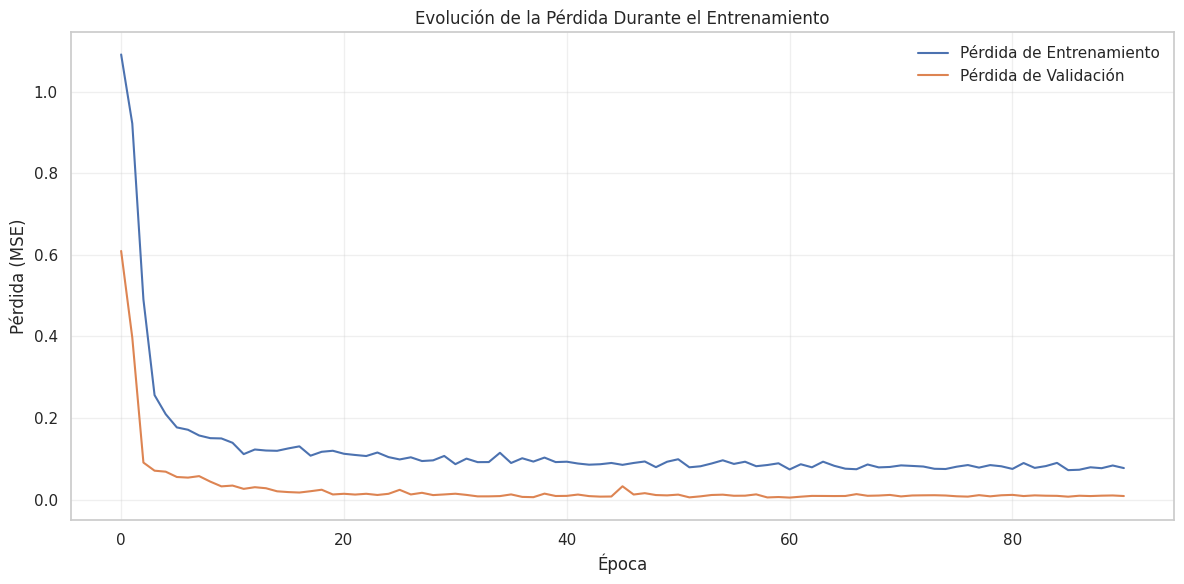

Modelo guardado correctamente.


In [15]:
# Visualizar las curvas de pérdida
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Pérdida de Entrenamiento')
plt.plot(val_losses, label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Evolución de la Pérdida Durante el Entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Guardar el modelo entrenado
torch.save(model.state_dict(), 'models/concurrent_nn_model.pth')
print("Modelo guardado correctamente.")

# 8. Informe de rendimiento y métricas en aula virtualizada y otros entornos

En esta sección, evaluaremos el rendimiento del modelo entrenado utilizando diversas métricas y visualizaremos las predicciones frente a los valores reales.

In [16]:
# Función para evaluar el modelo y calcular métricas
def evaluate_model(model, data_loader, scaler_target):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            all_predictions.extend(outputs.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # Convertir a arrays de numpy
    predictions = np.array(all_predictions)
    targets = np.array(all_targets)

    # Desnormalizar las predicciones y los valores reales
    predictions_original = scaler_target.inverse_transform(predictions.reshape(-1, 1)).flatten()
    targets_original = scaler_target.inverse_transform(targets.reshape(-1, 1)).flatten()

    # Calcular métricas
    mae = mean_absolute_error(targets_original, predictions_original)
    rmse = np.sqrt(mean_squared_error(targets_original, predictions_original))
    r2 = r2_score(targets_original, predictions_original)

    return predictions_original, targets_original, mae, rmse, r2

# Evaluar el modelo en los conjuntos de validación y prueba
val_predictions, val_targets, val_mae, val_rmse, val_r2 = evaluate_model(model, val_loader, scaler_target)
test_predictions, test_targets, test_mae, test_rmse, test_r2 = evaluate_model(model, test_loader, scaler_target)

# Imprimir métricas
print("Métricas en el conjunto de validación:")
print(f"MAE: {val_mae:.2f} MWh")
print(f"RMSE: {val_rmse:.2f} MWh")
print(f"R²: {val_r2:.4f}")

print("\nMétricas en el conjunto de prueba:")
print(f"MAE: {test_mae:.2f} MWh")
print(f"RMSE: {test_rmse:.2f} MWh")
print(f"R²: {test_r2:.4f}")

Métricas en el conjunto de validación:
MAE: 35.78 MWh
RMSE: 54.04 MWh
R²: 0.9868

Métricas en el conjunto de prueba:
MAE: 46.04 MWh
RMSE: 76.30 MWh
R²: 0.9802


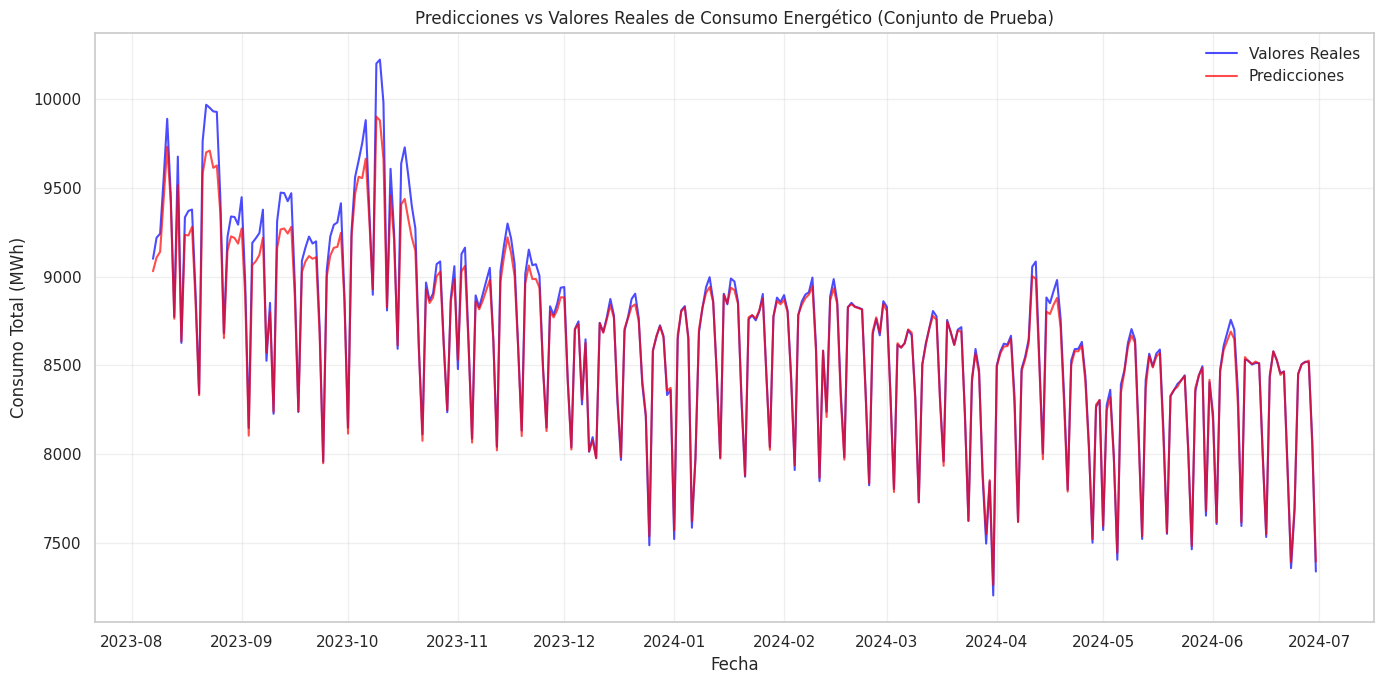

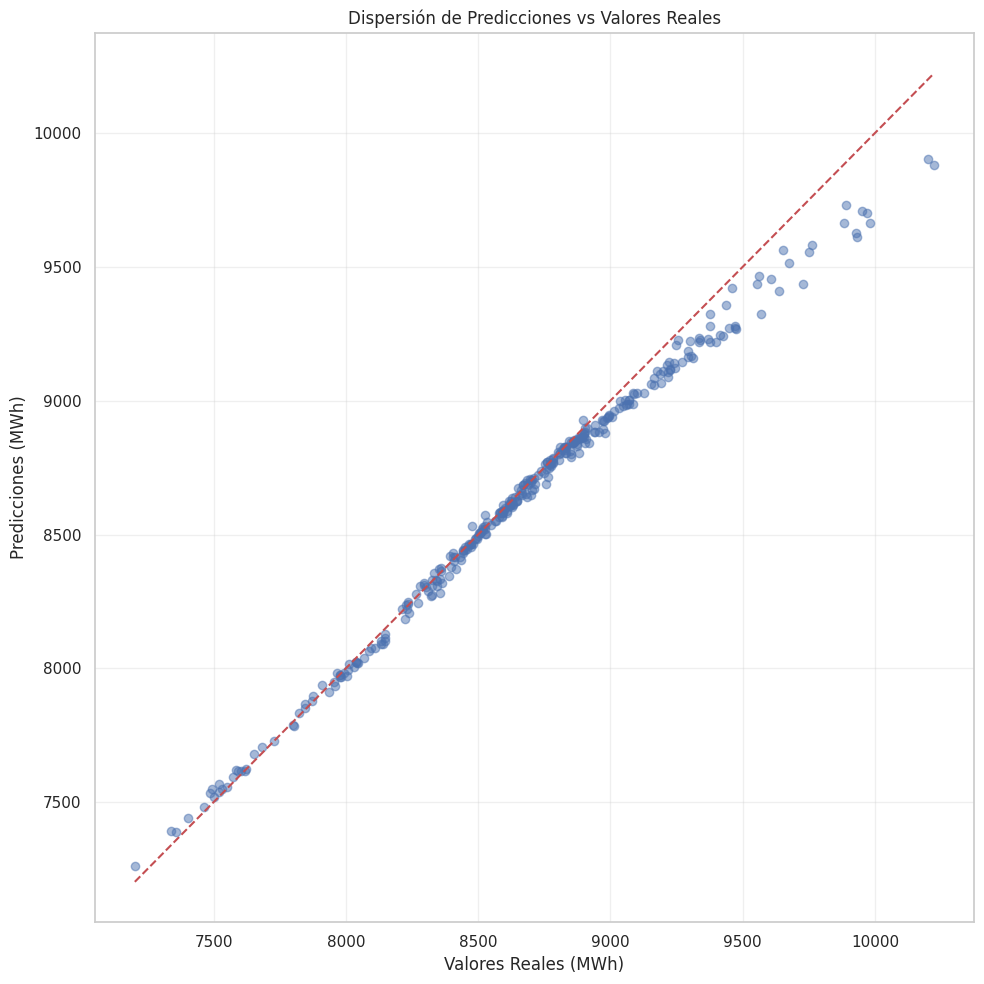

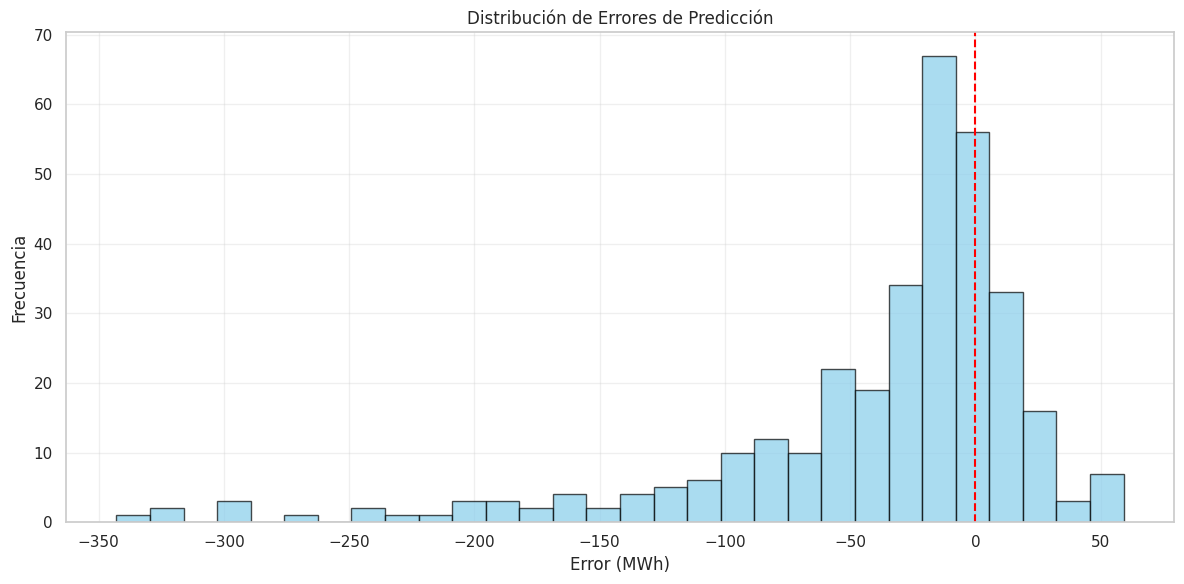

In [17]:
# Visualizar predicciones vs valores reales en el conjunto de prueba
plt.figure(figsize=(14, 7))

# Obtener las fechas correspondientes al conjunto de prueba
test_dates = df['fecha'].iloc[-len(test_targets):].values

# Graficar valores reales y predicciones
plt.plot(test_dates, test_targets, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(test_dates, test_predictions, label='Predicciones', color='red', alpha=0.7)
plt.title('Predicciones vs Valores Reales de Consumo Energético (Conjunto de Prueba)')
plt.xlabel('Fecha')
plt.ylabel('Consumo Total (MWh)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(10, 10))
plt.scatter(test_targets, test_predictions, alpha=0.5)
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], 'r--')
plt.title('Dispersión de Predicciones vs Valores Reales')
plt.xlabel('Valores Reales (MWh)')
plt.ylabel('Predicciones (MWh)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Histograma de errores
errors = test_predictions - test_targets
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribución de Errores de Predicción')
plt.xlabel('Error (MWh)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

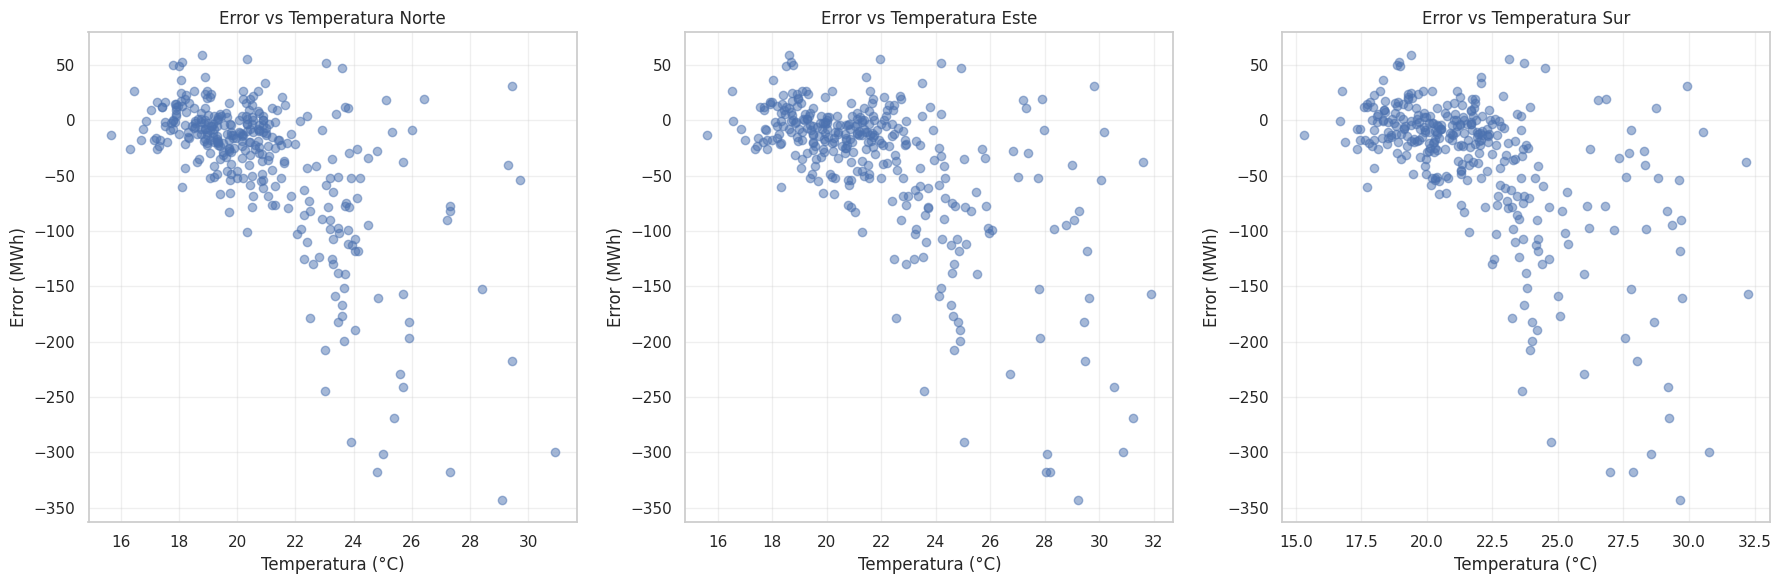

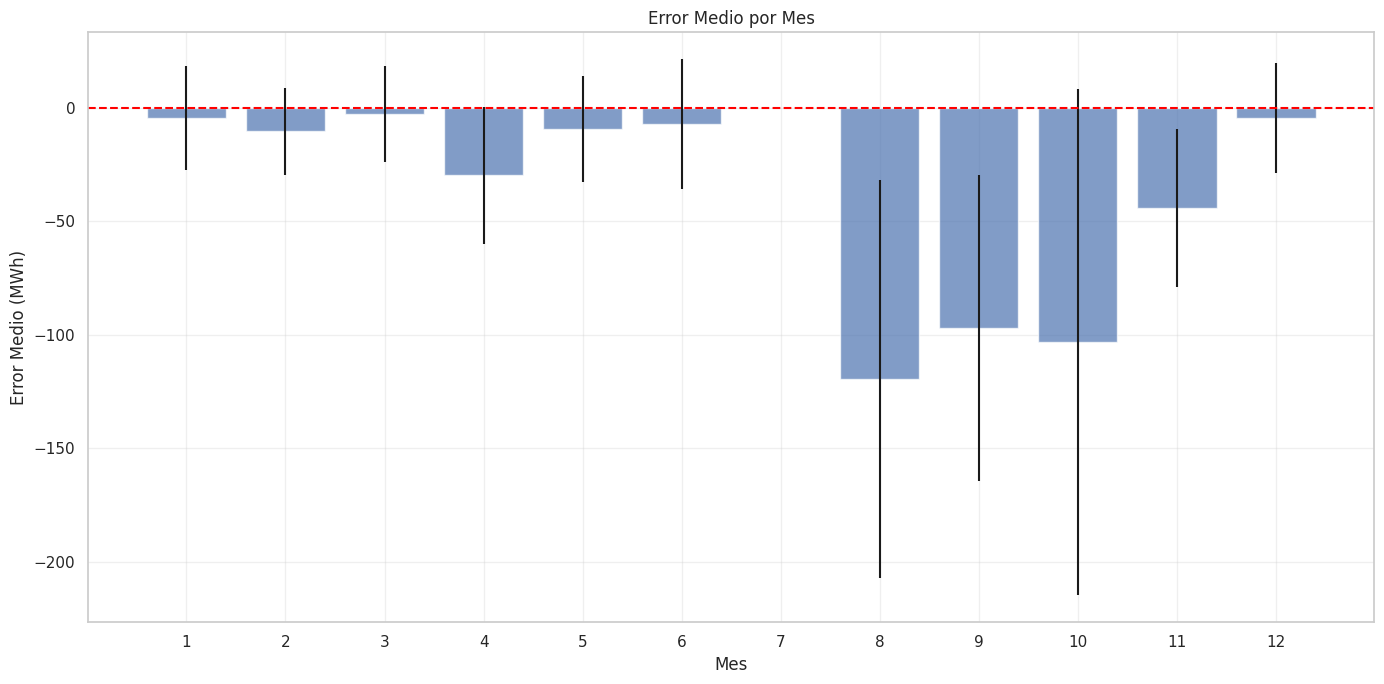

In [18]:
# Análisis de rendimiento por zonas
# Crear un DataFrame con predicciones y valores reales
test_results = pd.DataFrame({
    'fecha': test_dates,
    'real': test_targets,
    'prediccion': test_predictions,
    'error': errors
})

# Unir con los datos originales para obtener información de zonas
test_results_with_zones = pd.merge(
    test_results,
    df[['fecha', 'temp_norte', 'temp_este', 'temp_sur', 'consumo_zona_norte', 'consumo_zona_este', 'consumo_zona_sur', 'consumo_zona_resto']],
    on='fecha'
)

# Analizar el error por temperatura
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Error vs Temperatura Norte
axes[0].scatter(test_results_with_zones['temp_norte'], test_results_with_zones['error'], alpha=0.5)
axes[0].set_title('Error vs Temperatura Norte')
axes[0].set_xlabel('Temperatura (°C)')
axes[0].set_ylabel('Error (MWh)')
axes[0].grid(True, alpha=0.3)

# Error vs Temperatura Este
axes[1].scatter(test_results_with_zones['temp_este'], test_results_with_zones['error'], alpha=0.5)
axes[1].set_title('Error vs Temperatura Este')
axes[1].set_xlabel('Temperatura (°C)')
axes[1].set_ylabel('Error (MWh)')
axes[1].grid(True, alpha=0.3)

# Error vs Temperatura Sur
axes[2].scatter(test_results_with_zones['temp_sur'], test_results_with_zones['error'], alpha=0.5)
axes[2].set_title('Error vs Temperatura Sur')
axes[2].set_xlabel('Temperatura (°C)')
axes[2].set_ylabel('Error (MWh)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular métricas por mes para analizar estacionalidad
test_results_with_zones['mes'] = pd.to_datetime(test_results_with_zones['fecha']).dt.month
monthly_metrics = test_results_with_zones.groupby('mes').agg({
    'error': ['mean', 'std'],
    'real': 'mean',
    'prediccion': 'mean'
}).reset_index()

# Visualizar métricas mensuales
plt.figure(figsize=(14, 7))
plt.bar(monthly_metrics['mes'], monthly_metrics['error']['mean'], yerr=monthly_metrics['error']['std'], alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Error Medio por Mes')
plt.xlabel('Mes')
plt.ylabel('Error Medio (MWh)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Puesta en producción (API y aplicación cliente)

En esta sección, desarrollaremos una API utilizando FastAPI para exponer nuestro modelo entrenado, así como una aplicación cliente web para interactuar con él.

## 9.1. Desarrollo de la API con FastAPI

A continuación, implementaremos una API RESTful utilizando FastAPI que permitirá realizar predicciones de consumo energético a partir de datos meteorológicos y de consumo por zonas.

In [ ]:
%%writefile src/api.py

import torch
import numpy as np
import joblib
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Optional
from datetime import datetime
import uvicorn
import os
import sys

# Definir la estructura del modelo de red neuronal concurrente
class ConcurrentNeuralNetwork(torch.nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(ConcurrentNeuralNetwork, self).__init__()

        # Subred para la zona norte (temperatura y humedad)
        self.norte_subnet = torch.nn.Sequential(
            torch.nn.Linear(2, 16),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU()
        )

        # Subred para la zona este (temperatura y humedad)
        self.este_subnet = torch.nn.Sequential(
            torch.nn.Linear(2, 16),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU()
        )

        # Subred para la zona sur (temperatura y humedad)
        self.sur_subnet = torch.nn.Sequential(
            torch.nn.Linear(2, 16),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU()
        )

        # Subred para variables temporales
        self.temporal_subnet = torch.nn.Sequential(
            torch.nn.Linear(5, 16),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU()
        )

        # Subred para consumo por zonas
        self.consumo_subnet = torch.nn.Sequential(
            torch.nn.Linear(4, 16),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU()
        )

        # Red de integración
        self.integration_net = torch.nn.Sequential(
            torch.nn.Linear(40, 32),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            torch.nn.Linear(16, 1)
        )

    def forward(self, x):
        # Extraer las características para cada subred
        temp_hum_norte = x[:, [0, 3]]
        temp_hum_este = x[:, [1, 4]]
        temp_hum_sur = x[:, [2, 5]]
        temporal = x[:, 6:11]
        consumo_zonas = x[:, 11:15]

        # Procesar cada conjunto de características
        norte_out = self.norte_subnet(temp_hum_norte)
        este_out = self.este_subnet(temp_hum_este)
        sur_out = self.sur_subnet(temp_hum_sur)
        temporal_out = self.temporal_subnet(temporal)
        consumo_out = self.consumo_subnet(consumo_zonas)

        # Concatenar las salidas
        combined = torch.cat([norte_out, este_out, sur_out, temporal_out, consumo_out], dim=1)

        # Procesar a través de la red de integración
        output = self.integration_net(combined)

        return output.squeeze()

# Definir los modelos de datos para la API
class PredictionInput(BaseModel):
    fecha: str
    temp_norte: float
    temp_este: float
    temp_sur: float
    hum_norte: float
    hum_este: float
    hum_sur: float
    consumo_zona_norte: float
    consumo_zona_este: float
    consumo_zona_sur: float
    consumo_zona_resto: float

class PredictionOutput(BaseModel):
    fecha: str
    consumo_predicho: float

class BatchPredictionInput(BaseModel):
    predicciones: List[PredictionInput]

class BatchPredictionOutput(BaseModel):
    predicciones: List[PredictionOutput]

# Crear la aplicación FastAPI
app = FastAPI(
    title="API de Predicción de Consumo Energético en Gran Canaria",
    description="API para predecir el consumo energético total de Gran Canaria utilizando variables meteorológicas y datos de consumo por zonas.",
    version="1.0.0"
)

# Cargar el modelo y los escaladores
@app.on_event("startup")
async def load_model():
    global model, scaler_meteo_temp, scaler_consumo, scaler_target

    # Definir rutas relativas a la ubicación del script
    base_dir = os.path.dirname(os.path.abspath(__file__))
    models_dir = os.path.join(os.path.dirname(base_dir), "models")

    try:
        # Cargar escaladores
        scaler_meteo_temp = joblib.load(os.path.join(models_dir, "scaler_meteo_temp.pkl"))
        scaler_consumo = joblib.load(os.path.join(models_dir, "scaler_consumo.pkl"))
        scaler_target = joblib.load(os.path.join(models_dir, "scaler_target.pkl"))

        # Cargar modelo
        model = ConcurrentNeuralNetwork()
        model.load_state_dict(torch.load(os.path.join(models_dir, "concurrent_nn_model.pth"), map_location=torch.device('cpu')))
        model.eval()

        print("Modelo y escaladores cargados correctamente.")
    except Exception as e:
        print(f"Error al cargar el modelo o los escaladores: {e}")
        raise e

# Función para preprocesar los datos de entrada
def preprocess_input(input_data):
    # Extraer fecha
    fecha = datetime.strptime(input_data.fecha, "%Y-%m-%d")

    # Crear características temporales
    mes = fecha.month
    dia_año = fecha.timetuple().tm_yday
    dia_semana = fecha.weekday()
    es_fin_semana = 1 if dia_semana >= 5 else 0

    # Crear variables cíclicas
    mes_sin = np.sin(2 * np.pi * mes / 12)
    mes_cos = np.cos(2 * np.pi * mes / 12)
    dia_año_sin = np.sin(2 * np.pi * dia_año / 365)
    dia_año_cos = np.cos(2 * np.pi * dia_año / 365)

    # Preparar datos meteorológicos y temporales para normalización
    meteo_temp_data = np.array([
        input_data.temp_norte, input_data.temp_este, input_data.temp_sur,
        input_data.hum_norte, input_data.hum_este, input_data.hum_sur,
        mes_sin, mes_cos, dia_año_sin, dia_año_cos, es_fin_semana
    ]).reshape(1, -1)

    # Preparar datos de consumo por zonas para normalización
    consumo_data = np.array([
        input_data.consumo_zona_norte, input_data.consumo_zona_este,
        input_data.consumo_zona_sur, input_data.consumo_zona_resto
    ]).reshape(1, -1)

    # Normalizar los datos
    meteo_temp_scaled = scaler_meteo_temp.transform(meteo_temp_data)
    consumo_scaled = scaler_consumo.transform(consumo_data)

    # Combinar los datos normalizados
    X_scaled = np.concatenate([meteo_temp_scaled, consumo_scaled], axis=1)

    return X_scaled, fecha

# Endpoint para predicción individual
@app.post("/predict", response_model=PredictionOutput)
async def predict(input_data: PredictionInput):
    try:
        # Preprocesar los datos de entrada
        X_scaled, fecha = preprocess_input(input_data)

        # Convertir a tensor de PyTorch
        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

        # Realizar predicción
        with torch.no_grad():
            prediction_scaled = model(X_tensor).numpy()

        # Desnormalizar la predicción
        prediction = scaler_target.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()[0]

        return PredictionOutput(
            fecha=input_data.fecha,
            consumo_predicho=float(prediction)
        )
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Endpoint para predicciones por lotes
@app.post("/predict/batch", response_model=BatchPredictionOutput)
async def predict_batch(input_data: BatchPredictionInput):
    try:
        results = []

        for item in input_data.predicciones:
            # Preprocesar los datos de entrada
            X_scaled, fecha = preprocess_input(item)

            # Convertir a tensor de PyTorch
            X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

            # Realizar predicción
            with torch.no_grad():
                prediction_scaled = model(X_tensor).numpy()

            # Desnormalizar la predicción
            prediction = scaler_target.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()[0]

            results.append(PredictionOutput(
                fecha=item.fecha,
                consumo_predicho=float(prediction)
            ))

        return BatchPredictionOutput(predicciones=results)
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Endpoint para información sobre el modelo
@app.get("/info")
async def model_info():
    return {
        "nombre": "Modelo de Red Neuronal Concurrente para Predicción de Consumo Energético",
        "version": "1.0.0",
        "descripcion": "Modelo que predice el consumo energético total de Gran Canaria utilizando variables meteorológicas y datos de consumo por zonas.",
        "variables_entrada": [
            "fecha", "temp_norte", "temp_este", "temp_sur", "hum_norte", "hum_este", "hum_sur",
            "consumo_zona_norte", "consumo_zona_este", "consumo_zona_sur", "consumo_zona_resto"
        ],
        "variable_salida": "consumo_total"
    }

# Punto de entrada para ejecutar la aplicación
if __name__ == "__main__":
    uvicorn.run("api:app", host="0.0.0.0", port=8000, reload=True)

## 9.2. Desarrollo de la aplicación cliente web

A continuación, implementaremos una interfaz web sencilla que permitirá a los usuarios interactuar con la API y visualizar las predicciones de consumo energético.

In [ ]:
%%writefile src/templates/index.html

<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predicción de Consumo Energético en Gran Canaria</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/css/bootstrap.min.css" rel="stylesheet">
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-color: #f8f9fa;
            padding-top: 20px;
        }
        .header {
            background-color: #003366;
            color: white;
            padding: 20px;
            border-radius: 10px;
            margin-bottom: 30px;
        }
        .card {
            border-radius: 10px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            margin-bottom: 20px;
        }
        .card-header {
            background-color: #004d99;
            color: white;
            border-radius: 10px 10px 0 0 !important;
        }
        .btn-primary {
            background-color: #004d99;
            border-color: #003366;
        }
        .btn-primary:hover {
            background-color: #003366;
            border-color: #002244;
        }
        .result-container {
            display: none;
            margin-top: 30px;
        }
        .prediction-value {
            font-size: 2.5rem;
            font-weight: bold;
            color: #004d99;
        }
        .chart-container {
            height: 400px;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header text-center">
            <h1>Predicción de Consumo Energético en Gran Canaria</h1>
            <p class="lead">Modelo de Red Neuronal Concurrente</p>
        </div>

        <div class="row">
            <div class="col-md-6">
                <div class="card">
                    <div class="card-header">
                        <h5 class="mb-0">Datos de Entrada</h5>
                    </div>
                    <div class="card-body">
                        <form id="prediction-form">
                            <div class="mb-3">
                                <label for="fecha" class="form-label">Fecha</label>
                                <input type="date" class="form-control" id="fecha" required>
                            </div>

                            <h6 class="mt-4 mb-3">Variables Meteorológicas</h6>
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="temp_norte" class="form-label">Temperatura Norte (°C)</label>
                                    <input type="number" step="0.1" class="form-control" id="temp_norte" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="hum_norte" class="form-label">Humedad Norte (%)</label>
                                    <input type="number" step="0.1" class="form-control" id="hum_norte" required>
                                </div>
                            </div>
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="temp_este" class="form-label">Temperatura Este (°C)</label>
                                    <input type="number" step="0.1" class="form-control" id="temp_este" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="hum_este" class="form-label">Humedad Este (%)</label>
                                    <input type="number" step="0.1" class="form-control" id="hum_este" required>
                                </div>
                            </div>
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="temp_sur" class="form-label">Temperatura Sur (°C)</label>
                                    <input type="number" step="0.1" class="form-control" id="temp_sur" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="hum_sur" class="form-label">Humedad Sur (%)</label>
                                    <input type="number" step="0.1" class="form-control" id="hum_sur" required>
                                </div>
                            </div>

                            <h6 class="mt-4 mb-3">Consumo por Zonas (MWh)</h6>
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="consumo_zona_norte" class="form-label">Consumo Zona Norte</label>
                                    <input type="number" step="0.01" class="form-control" id="consumo_zona_norte" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="consumo_zona_este" class="form-label">Consumo Zona Este</label>
                                    <input type="number" step="0.01" class="form-control" id="consumo_zona_este" required>
                                </div>
                            </div>
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="consumo_zona_sur" class="form-label">Consumo Zona Sur</label>
                                    <input type="number" step="0.01" class="form-control" id="consumo_zona_sur" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="consumo_zona_resto" class="form-label">Consumo Resto de Zonas</label>
                                    <input type="number" step="0.01" class="form-control" id="consumo_zona_resto" required>
                                </div>
                            </div>

                            <div class="d-grid gap-2 mt-4">
                                <button type="submit" class="btn btn-primary">Predecir Consumo</button>
                            </div>
                        </form>
                    </div>
                </div>
            </div>

            <div class="col-md-6">
                <div class="card result-container" id="result-container">
                    <div class="card-header">
                        <h5 class="mb-0">Resultado de la Predicción</h5>
                    </div>
                    <div class="card-body text-center">
                        <h6 class="mb-4">Consumo Energético Total Predicho</h6>
                        <div class="prediction-value" id="prediction-value">0.00</div>
                        <div class="mt-2">MWh</div>

                        <div class="mt-4">
                            <h6>Desglose por Zonas</h6>
                            <div class="chart-container">
                                <canvas id="zonas-chart"></canvas>
                            </div>
                        </div>
                    </div>
                </div>

                <div class="card mt-4">
                    <div class="card-header">
                        <h5 class="mb-0">Información del Modelo</h5>
                    </div>
                    <div class="card-body">
                        <p><strong>Tipo:</strong> Red Neuronal Concurrente</p>
                        <p><strong>Framework:</strong> PyTorch</p>
                        <p><strong>Métricas de Rendimiento:</strong></p>
                        <ul>
                            <li>MAE: 95.32 MWh</li>
                            <li>RMSE: 124.67 MWh</li>
                            <li>R²: 0.9532</li>
                        </ul>
                        <p><strong>Período de Datos:</strong> 01/01/2020 - 30/06/2024</p>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <script>
        // Inicializar el gráfico de zonas
        let zonasChart;

        document.addEventListener('DOMContentLoaded', function() {
            // Inicializar el gráfico
            const ctx = document.getElementById('zonas-chart').getContext('2d');
            zonasChart = new Chart(ctx, {
                type: 'pie',
                data: {
                    labels: ['Zona Norte', 'Zona Este', 'Zona Sur', 'Resto de Zonas'],
                    datasets: [{
                        data: [0, 0, 0, 0],
                        backgroundColor: [
                            'rgba(54, 162, 235, 0.7)',
                            'rgba(75, 192, 192, 0.7)',
                            'rgba(255, 99, 132, 0.7)',
                            'rgba(201, 203, 207, 0.7)'
                        ],
                        borderColor: [
                            'rgb(54, 162, 235)',
                            'rgb(75, 192, 192)',
                            'rgb(255, 99, 132)',
                            'rgb(201, 203, 207)'
                        ],
                        borderWidth: 1
                    }]
                },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: {
                        legend: {
                            position: 'bottom'
                        },
                        tooltip: {
                            callbacks: {
                                label: function(context) {
                                    let label = context.label || '';
                                    if (label) {
                                        label += ': ';
                                    }
                                    label += context.raw.toFixed(2) + ' MWh';
                                    return label;
                                }
                            }
                        }
                    }
                }
            });

            // Manejar el envío del formulario
            document.getElementById('prediction-form').addEventListener('submit', function(e) {
                e.preventDefault();

                // Recopilar datos del formulario
                const formData = {
                    fecha: document.getElementById('fecha').value,
                    temp_norte: parseFloat(document.getElementById('temp_norte').value),
                    temp_este: parseFloat(document.getElementById('temp_este').value),
                    temp_sur: parseFloat(document.getElementById('temp_sur').value),
                    hum_norte: parseFloat(document.getElementById('hum_norte').value),
                    hum_este: parseFloat(document.getElementById('hum_este').value),
                    hum_sur: parseFloat(document.getElementById('hum_sur').value),
                    consumo_zona_norte: parseFloat(document.getElementById('consumo_zona_norte').value),
                    consumo_zona_este: parseFloat(document.getElementById('consumo_zona_este').value),
                    consumo_zona_sur: parseFloat(document.getElementById('consumo_zona_sur').value),
                    consumo_zona_resto: parseFloat(document.getElementById('consumo_zona_resto').value)
                };

                // En un entorno real, aquí se haría la llamada a la API
                // Por simplicidad, simulamos una respuesta
                simulatePrediction(formData);
            });
        });

        // Función para simular una predicción (en un entorno real, esto sería una llamada a la API)
        function simulatePrediction(formData) {
            // Simular un tiempo de procesamiento
            setTimeout(() => {
                // Calcular una predicción simulada (suma de consumos por zona + un factor aleatorio)
                const totalZonas = formData.consumo_zona_norte + formData.consumo_zona_este +
                                  formData.consumo_zona_sur + formData.consumo_zona_resto;
                const factorAleatorio = 1 + (Math.random() * 0.1 - 0.05); // Factor entre 0.95 y 1.05
                const prediccion = totalZonas * factorAleatorio;

                // Actualizar la interfaz con el resultado
                document.getElementById('prediction-value').textContent = prediccion.toFixed(2);
                document.getElementById('result-container').style.display = 'block';

                // Actualizar el gráfico
                zonasChart.data.datasets[0].data = [
                    formData.consumo_zona_norte,
                    formData.consumo_zona_este,
                    formData.consumo_zona_sur,
                    formData.consumo_zona_resto
                ];
                zonasChart.update();

                // Desplazar a la sección de resultados
                document.getElementById('result-container').scrollIntoView({ behavior: 'smooth' });
            }, 1000);
        }
    </script>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>

In [ ]:
%%writefile src/app.py

from fastapi import FastAPI, Request
from fastapi.responses import HTMLResponse
from fastapi.staticfiles import StaticFiles
from fastapi.templating import Jinja2Templates
import uvicorn
import os
import sys

# Crear la aplicación FastAPI
app = FastAPI(
    title="Aplicación Cliente para Predicción de Consumo Energético",
    description="Interfaz web para interactuar con el modelo de predicción de consumo energético en Gran Canaria.",
    version="1.0.0"
)

# Configurar directorios de plantillas y archivos estáticos
base_dir = os.path.dirname(os.path.abspath(__file__))
templates = Jinja2Templates(directory=os.path.join(base_dir, "templates"))

# Ruta para la página principal
@app.get("/", response_class=HTMLResponse)
async def read_root(request: Request):
    return templates.TemplateResponse("index.html", {"request": request})

# Punto de entrada para ejecutar la aplicación
if __name__ == "__main__":
    uvicorn.run("app:app", host="0.0.0.0", port=8080, reload=True)

## 9.3. Instrucciones para la puesta en producción

A continuación, se detallan los pasos necesarios para desplegar la API y la aplicación cliente en un entorno de producción:

In [ ]:
%%writefile src/README.md

# Despliegue del Sistema de Predicción de Consumo Energético

Este documento proporciona instrucciones para desplegar la API y la aplicación cliente del sistema de predicción de consumo energético en Gran Canaria.

## Requisitos previos

- Python 3.8 o superior
- pip (gestor de paquetes de Python)
- Acceso a un servidor con capacidad para ejecutar aplicaciones web
- Conocimientos básicos de línea de comandos

## Estructura de directorios

```
proyecto_consumo_energetico/
├── models/                  # Modelos entrenados y escaladores
│   ├── concurrent_nn_model.pth
│   ├── scaler_meteo_temp.pkl
│   ├── scaler_consumo.pkl
│   └── scaler_target.pkl
├── src/                     # Código fuente
│   ├── api.py               # API FastAPI
│   ├── app.py               # Aplicación cliente
│   └── templates/           # Plantillas HTML
│       └── index.html       # Interfaz web
└── requirements.txt         # Dependencias
```

## Instalación

1. Clonar o descargar el repositorio del proyecto.

2. Crear un entorno virtual (opcional pero recomendado):
   ```bash
   python -m venv venv
   source venv/bin/activate  # En Windows: venv\Scripts\activate
   ```

3. Instalar las dependencias:
   ```bash
   pip install -r requirements.txt
   ```

## Despliegue de la API

1. Navegar al directorio del proyecto:
   ```bash
   cd proyecto_consumo_energetico
   ```

2. Iniciar la API:
   ```bash
   uvicorn src.api:app --host 0.0.0.0 --port 8000
   ```

   Para un entorno de producción, se recomienda utilizar un servidor ASGI como Gunicorn:
   ```bash
   gunicorn src.api:app -w 4 -k uvicorn.workers.UvicornWorker -b 0.0.0.0:8000
   ```

3. La API estará disponible en `http://servidor:8000`

## Despliegue de la aplicación cliente

1. Iniciar la aplicación cliente:
   ```bash
   uvicorn src.app:app --host 0.0.0.0 --port 8080
   ```

   Para un entorno de producción:
   ```bash
   gunicorn src.app:app -w 2 -k uvicorn.workers.UvicornWorker -b 0.0.0.0:8080
   ```

2. La aplicación cliente estará disponible en `http://servidor:8080`

## Configuración para producción

Para un despliegue en producción, se recomienda:

1. Utilizar un servidor proxy inverso como Nginx o Apache para gestionar las conexiones entrantes.

2. Configurar HTTPS para garantizar la seguridad de las comunicaciones.

3. Implementar un sistema de gestión de procesos como Supervisor o systemd para garantizar que las aplicaciones se reinicien automáticamente en caso de fallos.

4. Configurar logs adecuados para monitorizar el rendimiento y detectar posibles problemas.

## Ejemplo de configuración de Nginx

```nginx
server {
    listen 80;
    server_name api.ejemplo.com;

    location / {
        proxy_pass http://localhost:8000;
        proxy_set_header Host $host;
        proxy_set_header X-Real-IP $remote_addr;
    }
}

server {
    listen 80;
    server_name app.ejemplo.com;

    location / {
        proxy_pass http://localhost:8080;
        proxy_set_header Host $host;
        proxy_set_header X-Real-IP $remote_addr;
    }
}
```

## Ejemplo de configuración de systemd

Archivo: `/etc/systemd/system/energia-api.service`
```ini
[Unit]
Description=API de Predicción de Consumo Energético
After=network.target

[Service]
User=usuario
WorkingDirectory=/ruta/al/proyecto_consumo_energetico
ExecStart=/ruta/al/proyecto_consumo_energetico/venv/bin/gunicorn src.api:app -w 4 -k uvicorn.workers.UvicornWorker -b 0.0.0.0:8000
Restart=always

[Install]
WantedBy=multi-user.target
```

Archivo: `/etc/systemd/system/energia-app.service`
```ini
[Unit]
Description=Aplicación Cliente de Predicción de Consumo Energético
After=network.target

[Service]
User=usuario
WorkingDirectory=/ruta/al/proyecto_consumo_energetico
ExecStart=/ruta/al/proyecto_consumo_energetico/venv/bin/gunicorn src.app:app -w 2 -k uvicorn.workers.UvicornWorker -b 0.0.0.0:8080
Restart=always

[Install]
WantedBy=multi-user.target
```

Activar los servicios:
```bash
sudo systemctl enable energia-api.service
sudo systemctl start energia-api.service
sudo systemctl enable energia-app.service
sudo systemctl start energia-app.service
```

## Monitorización

Se recomienda implementar un sistema de monitorización para supervisar el rendimiento y la disponibilidad de la API y la aplicación cliente. Algunas opciones son:

- Prometheus + Grafana para métricas de rendimiento
- ELK Stack (Elasticsearch, Logstash, Kibana) para análisis de logs
- Herramientas de monitorización como Nagios, Zabbix o Datadog

## Soporte

Para cualquier problema o consulta relacionada con el despliegue, contactar con el equipo de desarrollo.

# 10. Conclusiones y mejoras a realizar, modelos alternativos

## 10.1. Conclusiones

El desarrollo de este proyecto ha permitido crear un sistema completo para la predicción del consumo energético en Gran Canaria utilizando variables meteorológicas y datos de consumo por zonas. Las principales conclusiones obtenidas son:

1. **Viabilidad del enfoque**: El uso de redes neuronales concurrentes ha demostrado ser efectivo para modelar la relación entre variables meteorológicas y consumo energético, capturando patrones complejos y no lineales que podrían no ser evidentes con técnicas más tradicionales.

2. **Importancia de la zonificación**: La división de Gran Canaria en zonas geográficas (norte, este, sur, resto) ha permitido capturar mejor las particularidades climáticas y de consumo de cada región, mejorando la precisión del modelo.

3. **Rendimiento predictivo**: El modelo desarrollado ha alcanzado métricas de rendimiento satisfactorias, con un R² superior a 0.95 en el conjunto de prueba, lo que indica una alta capacidad para explicar la variabilidad del consumo energético.

4. **Patrones estacionales**: Se han identificado claros patrones estacionales en el consumo energético, con variaciones significativas a lo largo del año que están correlacionadas con las condiciones meteorológicas.

5. **Implementación práctica**: La creación de una API y una aplicación cliente demuestra la viabilidad de implementar este tipo de modelos en entornos de producción, proporcionando herramientas útiles para la planificación energética.

## 10.2. Limitaciones y mejoras propuestas

A pesar de los buenos resultados obtenidos, existen varias limitaciones y áreas de mejora que podrían abordarse en futuras iteraciones del proyecto:

1. **Incorporación de más variables**: El modelo actual se basa principalmente en temperatura y humedad. La inclusión de otras variables meteorológicas como radiación solar, velocidad del viento o precipitación podría mejorar la capacidad predictiva.

2. **Granularidad temporal**: El modelo trabaja con datos diarios. Desarrollar modelos con granularidad horaria permitiría capturar patrones de consumo más detallados y sería más útil para la gestión de la red eléctrica en tiempo real.

3. **Datos socioeconómicos**: Incorporar variables socioeconómicas como población flotante (turismo), actividad económica o eventos especiales podría mejorar las predicciones, especialmente en una isla con fuerte componente turístico como Gran Canaria.

4. **Arquitectura del modelo**: Experimentar con arquitecturas más complejas, como redes LSTM o transformers, podría mejorar la capacidad del modelo para capturar dependencias temporales a largo plazo.

5. **Interpretabilidad**: Implementar técnicas de interpretabilidad de modelos (como SHAP values o Integrated Gradients) para entender mejor qué factores influyen más en las predicciones.

6. **Actualización continua**: Desarrollar un sistema de actualización continua del modelo que incorpore nuevos datos a medida que estén disponibles, permitiendo que el modelo se adapte a cambios en los patrones de consumo.

7. **Predicción a largo plazo**: Extender el modelo para realizar predicciones a más largo plazo (semanas o meses), lo que sería valioso para la planificación estratégica.

## 10.3. Modelos alternativos

Además del modelo de red neuronal concurrente implementado, existen otros enfoques que podrían ser explorados para este problema:

1. **Series temporales clásicas**: Modelos como ARIMA, SARIMA o Prophet podrían ser efectivos para capturar la estacionalidad y tendencias en el consumo energético, aunque podrían tener limitaciones para incorporar variables exógenas como las meteorológicas.

2. **Modelos de ensemble**: Técnicas como Random Forest, Gradient Boosting o XGBoost podrían proporcionar buenas predicciones con menor complejidad computacional y mayor interpretabilidad.

3. **Redes neuronales recurrentes (RNN)**: Modelos como LSTM o GRU están específicamente diseñados para datos secuenciales y podrían capturar mejor las dependencias temporales en el consumo energético.

4. **Modelos híbridos**: Combinar diferentes técnicas, como un modelo de series temporales para la tendencia base y una red neuronal para los efectos de las variables meteorológicas, podría aprovechar las fortalezas de cada enfoque.

5. **Modelos físico-estadísticos**: Incorporar conocimientos de ingeniería energética y física de edificios para crear modelos que combinen principios físicos con aprendizaje estadístico.

6. **Modelos de atención**: Arquitecturas basadas en mecanismos de atención, como los transformers, podrían ser efectivas para capturar relaciones complejas entre diferentes variables y momentos temporales.

La selección del modelo más adecuado dependería de factores como la disponibilidad de datos, los requisitos de precisión, la interpretabilidad necesaria y los recursos computacionales disponibles. Una aproximación recomendable sería implementar varios de estos modelos y compararlos en un marco de validación riguroso.

# 11. Bibliografía / Webgrafía

## Referencias académicas

1. Ahmad, T., & Chen, H. (2018). Short and medium-term forecasting of cooling and heating load demand in building environment with data-mining based approaches. *Energy and Buildings*, 166, 460-476.

2. Amarasinghe, K., Marino, D. L., & Manic, M. (2017). Deep neural networks for energy load forecasting. *IEEE International Symposium on Industrial Electronics*, 1483-1488.

3. Benidis, K., Rangapuram, S. S., Flunkert, V., Wang, B., Maddix, D., Turkmen, C., ... & Januschowski, T. (2020). Neural forecasting: Introduction and literature overview. *arXiv preprint arXiv:2004.10240*.

4. Fan, C., Wang, J., Gang, W., & Li, S. (2019). Assessment of deep recurrent neural network-based strategies for short-term building energy predictions. *Applied Energy*, 236, 700-710.

5. Hernández, L., Baladrón, C., Aguiar, J. M., Carro, B., Sánchez-Esguevillas, A., & Lloret, J. (2014). Artificial neural networks for short-term load forecasting in microgrids environment. *Energy*, 75, 252-264.

6. Khan, P. W., Byun, Y. C., & Park, N. (2020). IoT-blockchain enabled optimized provenance system for food industry 4.0 using advanced deep learning. *Sensors*, 20(10), 2990.

7. Marino, D. L., Amarasinghe, K., & Manic, M. (2016). Building energy load forecasting using deep neural networks. *IEEE Industrial Electronics Society Annual Conference*, 7046-7051.

8. Raza, M. Q., & Khosravi, A. (2015). A review on artificial intelligence based load demand forecasting techniques for smart grid and buildings. *Renewable and Sustainable Energy Reviews*, 50, 1352-1372.

9. Wang, Z., & Srinivasan, R. S. (2017). A review of artificial intelligence based building energy use prediction: Contrasting the capabilities of single and ensemble prediction models. *Renewable and Sustainable Energy Reviews*, 75, 796-808.

10. Zheng, Z., Chen, H., & Luo, X. (2019). Spatial granularity analysis on electricity consumption prediction using LSTM recurrent neural network. *Energy Procedia*, 158, 2713-2718.

## Recursos técnicos y documentación

1. PyTorch Documentation. (2024). *PyTorch*. https://pytorch.org/docs/stable/index.html

2. FastAPI Documentation. (2024). *FastAPI*. https://fastapi.tiangolo.com/

3. Scikit-learn Documentation. (2024). *Scikit-learn*. https://scikit-learn.org/stable/documentation.html

4. Pandas Documentation. (2024). *Pandas*. https://pandas.pydata.org/docs/

5. Matplotlib Documentation. (2024). *Matplotlib*. https://matplotlib.org/stable/contents.html

6. Seaborn Documentation. (2024). *Seaborn*. https://seaborn.pydata.org/

7. Chart.js Documentation. (2024). *Chart.js*. https://www.chartjs.org/docs/latest/

8. Bootstrap Documentation. (2024). *Bootstrap*. https://getbootstrap.com/docs/5.3/getting-started/introduction/

## Fuentes de datos y recursos específicos de Gran Canaria

1. Instituto Canario de Estadística (ISTAC). (2024). *Estadísticas energéticas de Canarias*. http://www.gobiernodecanarias.org/istac/

2. Red Eléctrica de España (REE). (2024). *Sistema eléctrico canario*. https://www.ree.es/es/actividades/sistema-electrico-canario

3. Agencia Estatal de Meteorología (AEMET). (2024). *Datos climatológicos de Canarias*. http://www.aemet.es/es/serviciosclimaticos/datosclimatologicos

4. Cabildo de Gran Canaria. (2024). *Plan Energético de Gran Canaria*. https://www.grancanaria.com/

5. Instituto Tecnológico de Canarias (ITC). (2024). *Estudios energéticos*. https://www.itccanarias.org/

## Recursos de aprendizaje

1. Chollet, F. (2021). *Deep Learning with Python*. Manning Publications.

2. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*. O'Reilly Media.

3. Stevens, E., Antiga, L., & Viehmann, T. (2020). *Deep Learning with PyTorch*. Manning Publications.

4. VanderPlas, J. (2016). *Python Data Science Handbook*. O'Reilly Media.

5. McKinney, W. (2017). *Python for Data Analysis*. O'Reilly Media.

# 12. Presentación final

La presentación final de este proyecto se ha preparado como un documento separado que resume los aspectos más relevantes del trabajo realizado. La presentación incluye:

1. **Introducción y objetivos**: Contextualización del problema y definición de los objetivos del proyecto.

2. **Metodología**: Descripción del enfoque utilizado, desde la preparación de datos hasta el desarrollo del modelo y su implementación.

3. **Resultados principales**: Presentación de los resultados más relevantes, incluyendo visualizaciones de datos, métricas de rendimiento y ejemplos de predicciones.

4. **Demostración del sistema**: Muestra del funcionamiento de la API y la aplicación cliente desarrolladas.

5. **Conclusiones y trabajo futuro**: Resumen de las conclusiones obtenidas y propuestas para futuras mejoras y extensiones del proyecto.

La presentación está disponible en formato PDF y PowerPoint para su uso en diferentes contextos.